# Order Delivery Time Prediction

**Submitted by: Shivam Prakash**

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
data = pd.read_csv('porter_data_1.csv')
data.head()

market_id      created_at actual_delivery_time  store_primary_category  \
0          1  06/02/15 22:24       06/02/15 23:11                       4   
1          2  10/02/15 21:49       10/02/15 22:33                      46   
2          2   16/02/15 0:11        16/02/15 1:06                      36   
3          1   12/02/15 3:36        12/02/15 4:35                      38   
4          1   27/01/15 2:12        27/01/15 2:58                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  int64  
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  int64  
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  int64  
 11  total_busy_dashers        175777 non-null  int64  
 12  total_outstanding_orders  175777 non-null  int64  
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int64         
 11  total_busy_dashers        175777 non-null  int64         
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    data[col] = data[col].astype('category')

data[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   market_id               175777 non-null  category
 1   store_primary_category  175777 non-null  category
 2   order_protocol          175777 non-null  category
dtypes: category(3)
memory usage: 518.3 KB


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes
data['time_taken'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60
data[['created_at', 'actual_delivery_time', 'time_taken']].head()

created_at actual_delivery_time  time_taken
0 2015-06-02 22:24:00  2015-06-02 23:11:00        47.0
1 2015-10-02 21:49:00  2015-10-02 22:33:00        44.0
2 2015-02-16 00:11:00  2015-02-16 01:06:00        55.0
3 2015-12-02 03:36:00  2015-12-02 04:35:00        59.0
4 2015-01-27 02:12:00  2015-01-27 02:58:00        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp
data['order_hour'] = data['created_at'].dt.hour.astype('category')
data['order_day_of_week'] = data['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'
data['isWeekend'] = data['order_day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0).astype('category')


In [8]:
# Drop unnecessary columns
data.drop(columns=['created_at', 'actual_delivery_time', 'order_day_of_week'], inplace=True)

In [9]:
data.describe()

total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
std         2.674055    1828.554893            1.625681      519.882924   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
std        560.828571              34.544724           32.168505   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   

       total_outstanding_orders       distance     time_taken  
count             175777.000000  175777.000000  175777.000000  
mean                  58.230115      21.843090     113.919722  
std                   52.731043       8.748712   13098.889461  
min                   -6.000000       0.000000 -421888.000000  
25%                   17.000000      15.360000      39.000000  
50%                   41.000000      21.760000      45.000000  
75%                   85.000000      28.120000      52.000000  
max                  285.000000      83.520000   43269.000000

In [10]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Removing rows where any numerical column has a negative value
data = data[(data[numerical_cols] >= 0).all(axis=1)]
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 175308 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175308 non-null  category
 1   store_primary_category    175308 non-null  category
 2   order_protocol            175308 non-null  category
 3   total_items               175308 non-null  int64   
 4   subtotal                  175308 non-null  int64   
 5   num_distinct_items        175308 non-null  int64   
 6   min_item_price            175308 non-null  int64   
 7   max_item_price            175308 non-null  int64   
 8   total_onshift_dashers     175308 non-null  int64   
 9   total_busy_dashers        175308 non-null  int64   
 10  total_outstanding_orders  175308 non-null  int64   
 11  distance                  175308 non-null  float64 
 12  time_taken                175308 non-null  float64 
 13  order_hour                175308 n

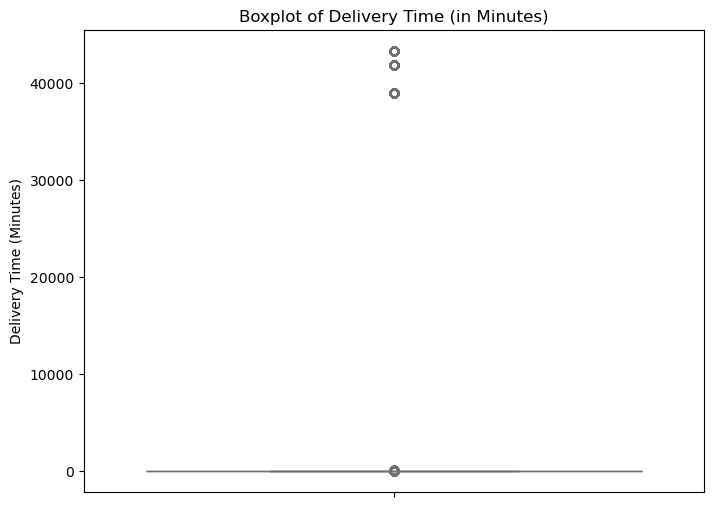

In [11]:
# Boxplot for time_taken for identifying outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['time_taken'], color='skyblue')
plt.title('Boxplot of Delivery Time (in Minutes)')
plt.ylabel('Delivery Time (Minutes)')
plt.show()


In [12]:
# Removing outliers from time_taken
data = data[data['time_taken'] <= 80]

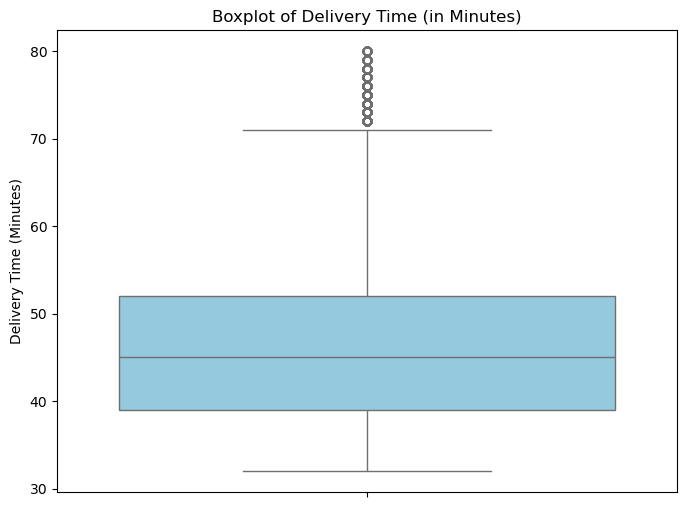

In [13]:
# Boxplot for time_taken after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['time_taken'], color='skyblue')
plt.title('Boxplot of Delivery Time (in Minutes)')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [14]:
# Define target variable (y) and features (X)
y = data['time_taken']
X = data.drop(columns=['time_taken'])

X.shape, y.shape


((172926, 14), (172926,))

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [15]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((138340, 14), (34586, 14), (138340,), (34586,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [16]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()

print(f'Numerical columns are: {numerical_cols}\n')
print(f'Categorical columns are: {categorical_cols}\n')


Numerical columns are: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

Categorical columns are: ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'isWeekend']



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

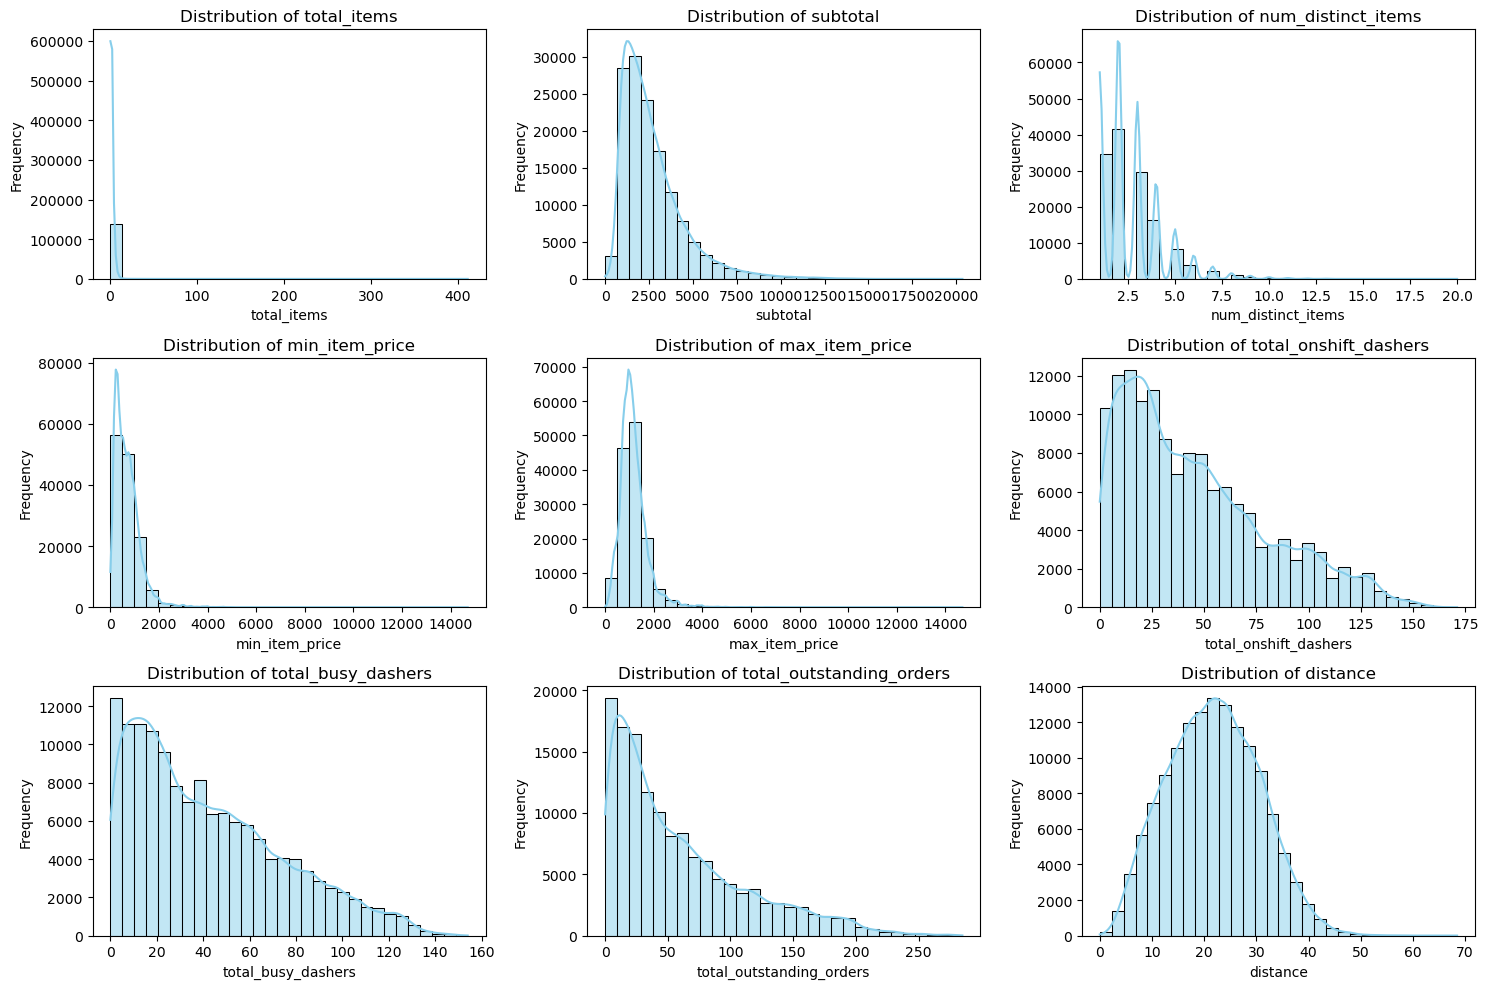

In [17]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

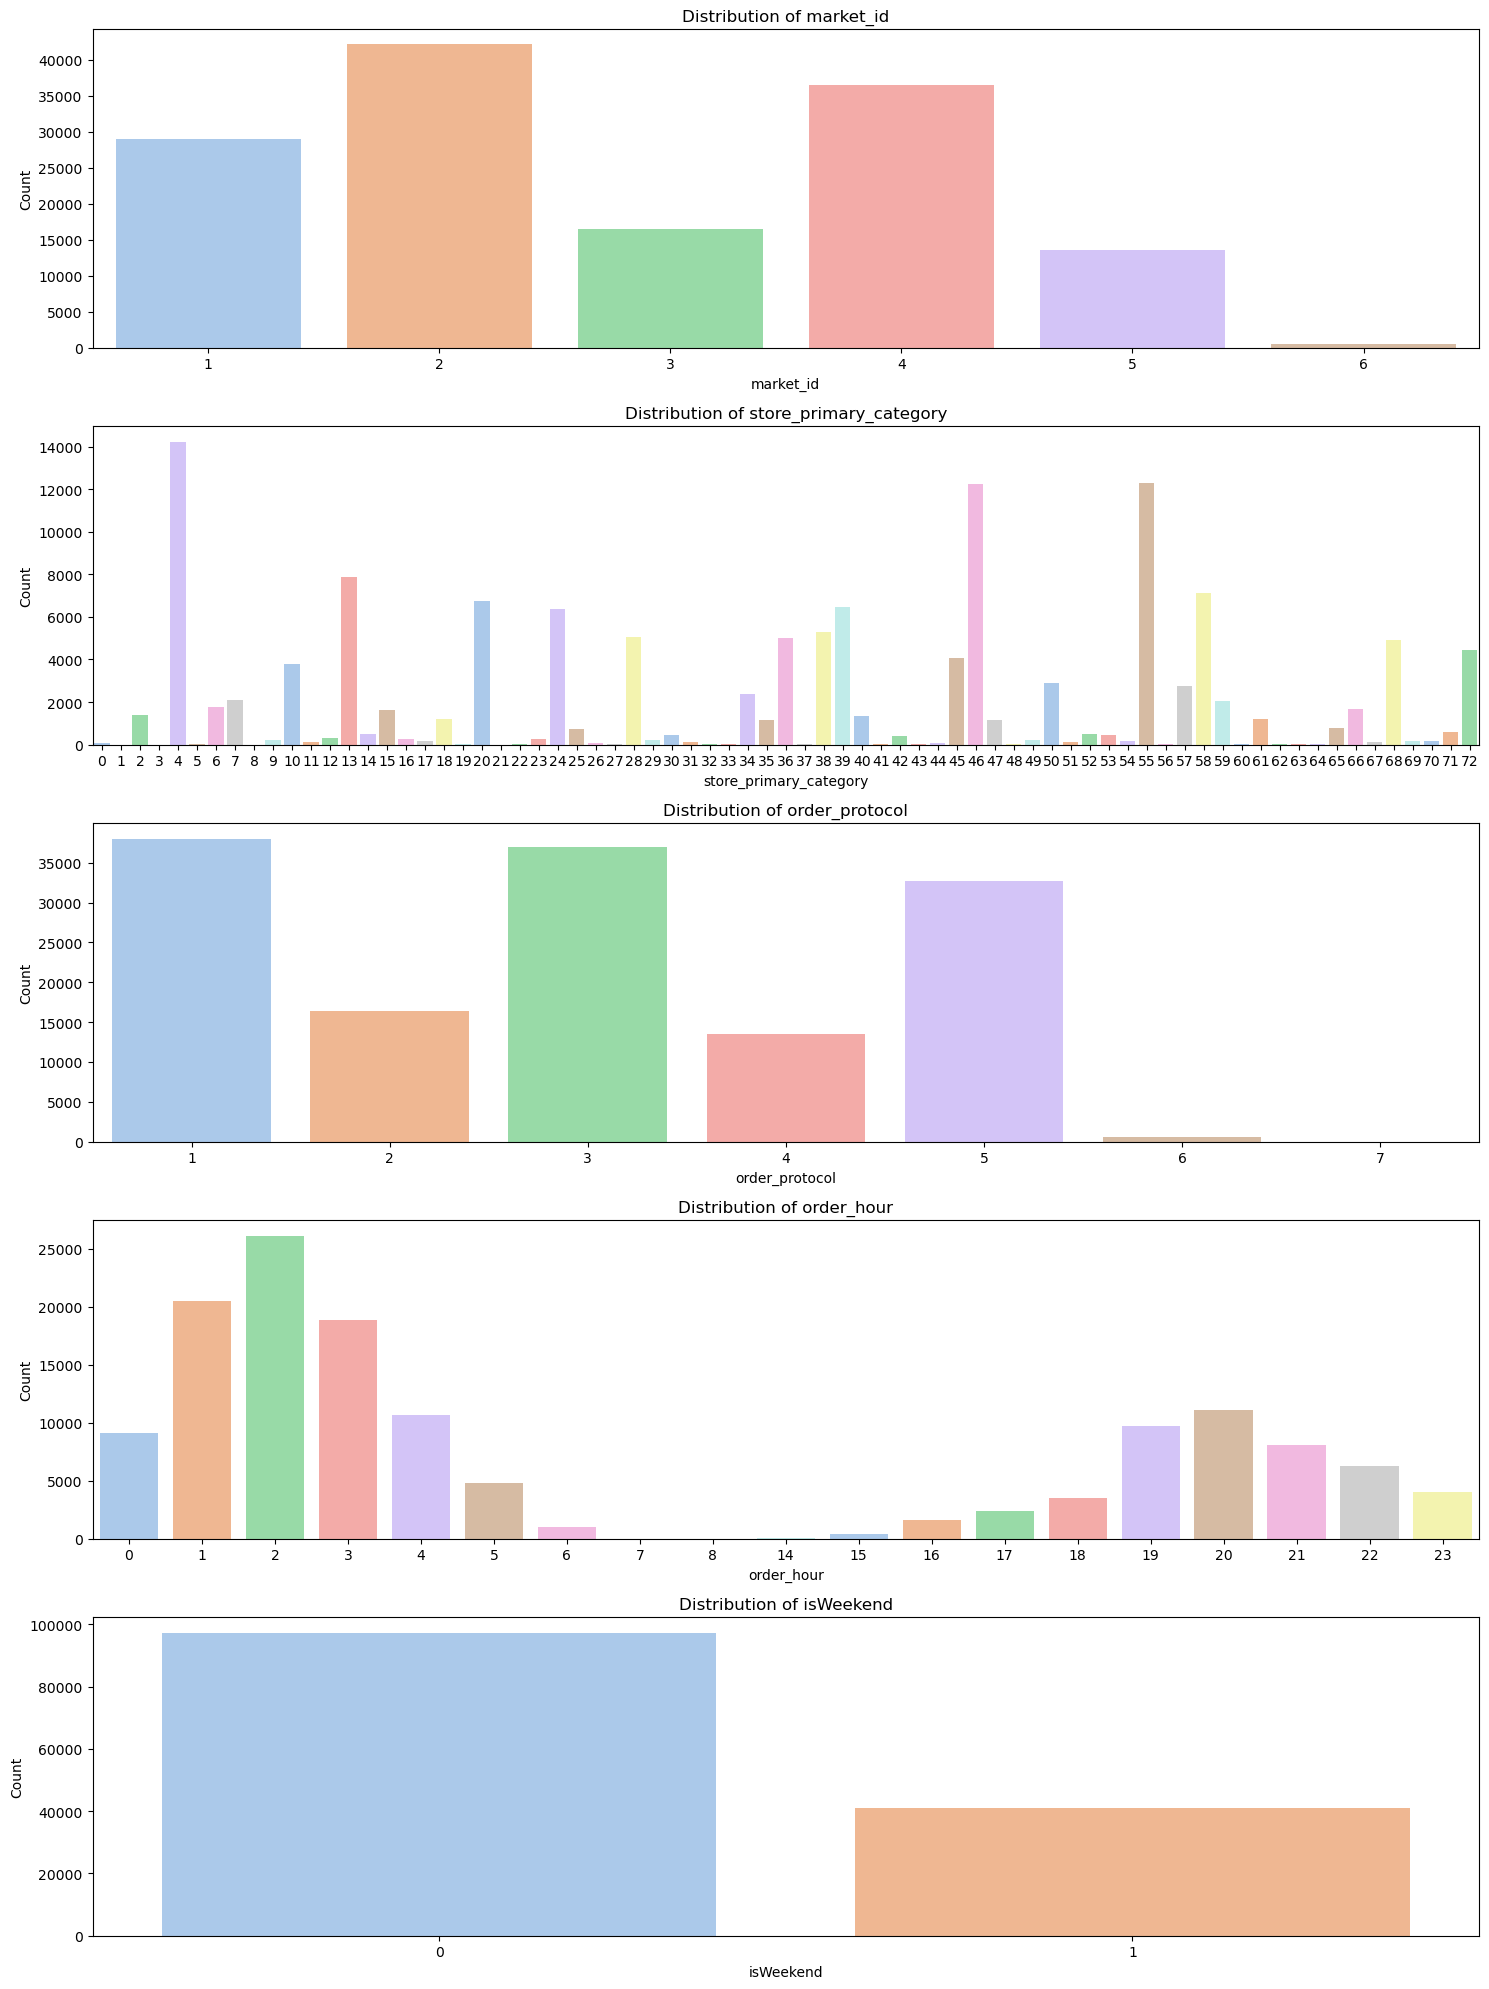

In [18]:
# Distribution of categorical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 1, i + 1)
    sns.countplot(x=X_train[col], palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

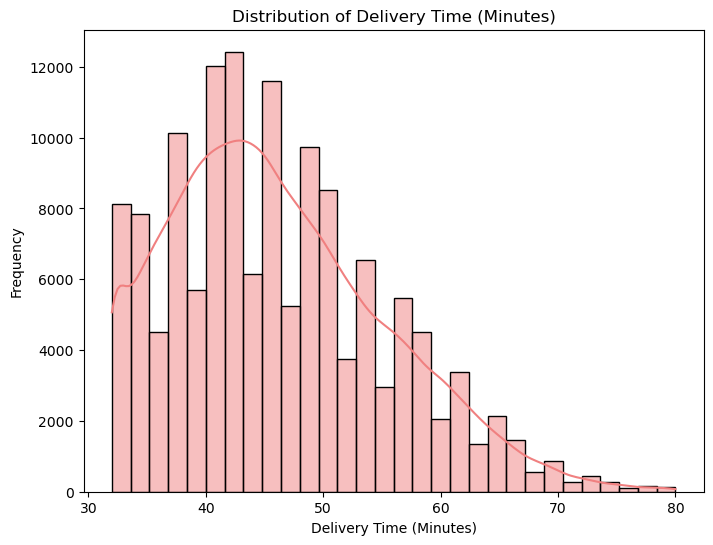

In [19]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

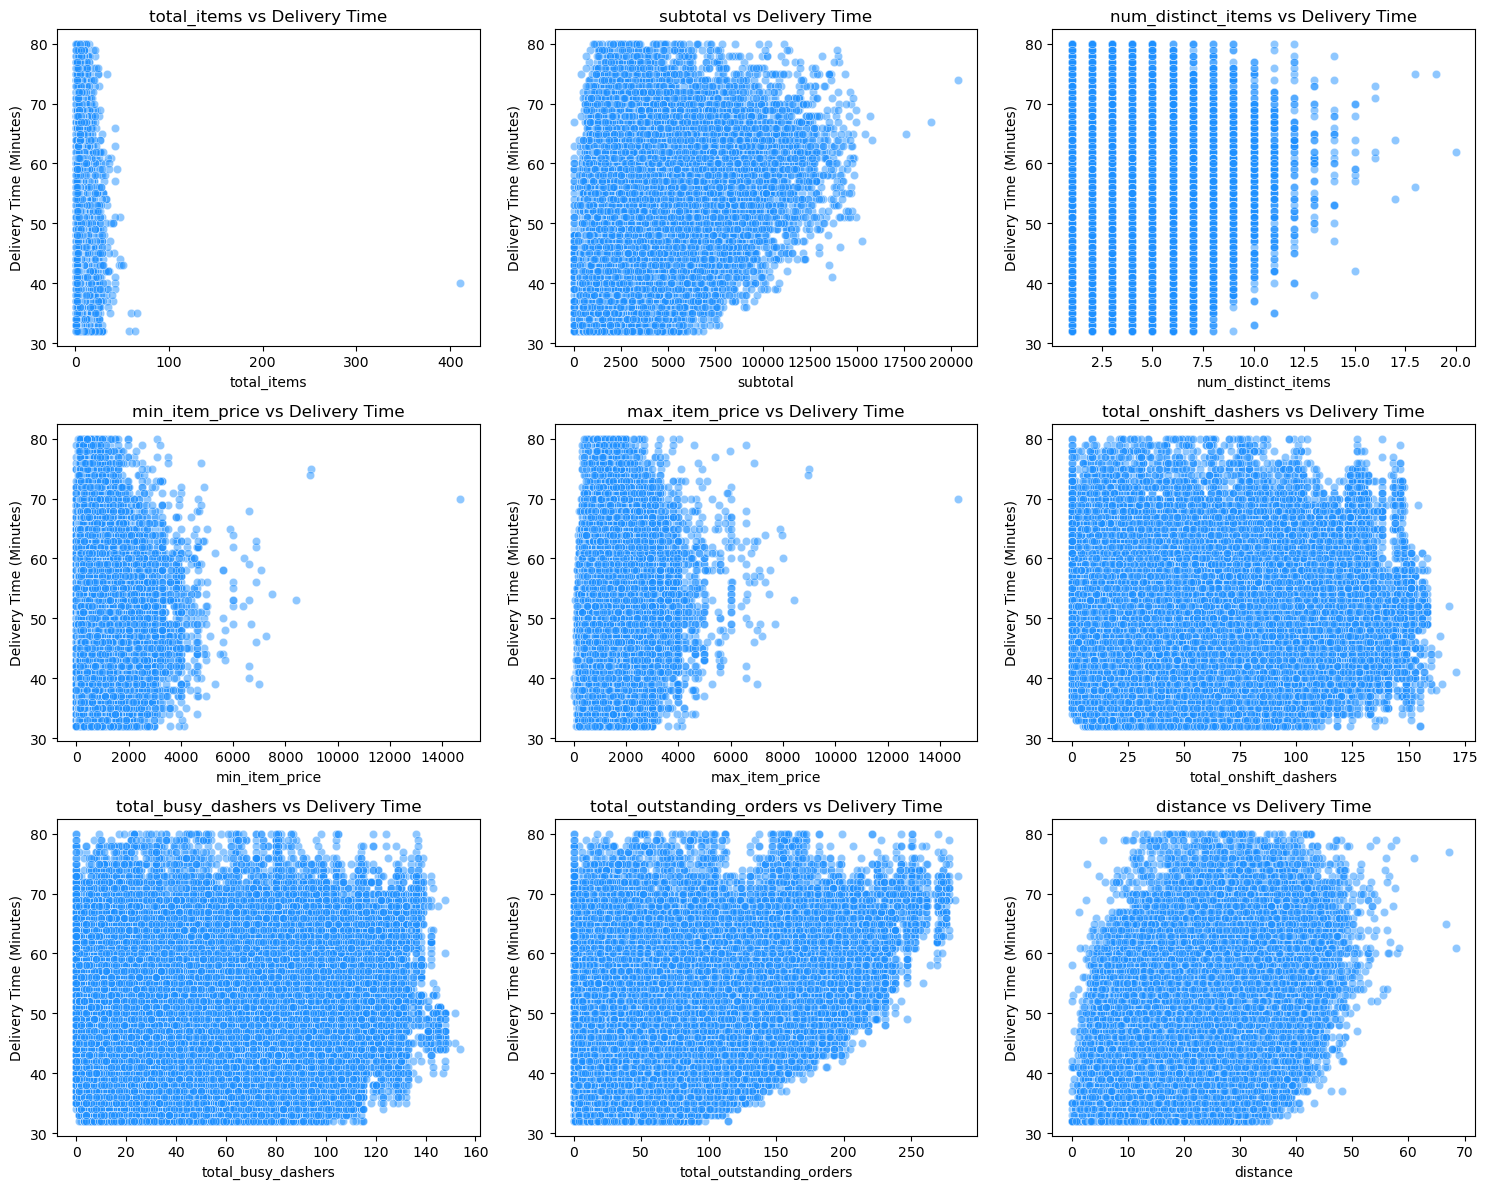

In [20]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, color='dodgerblue')
    plt.title(f'{col} vs Delivery Time')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (Minutes)')

plt.tight_layout()
plt.show()


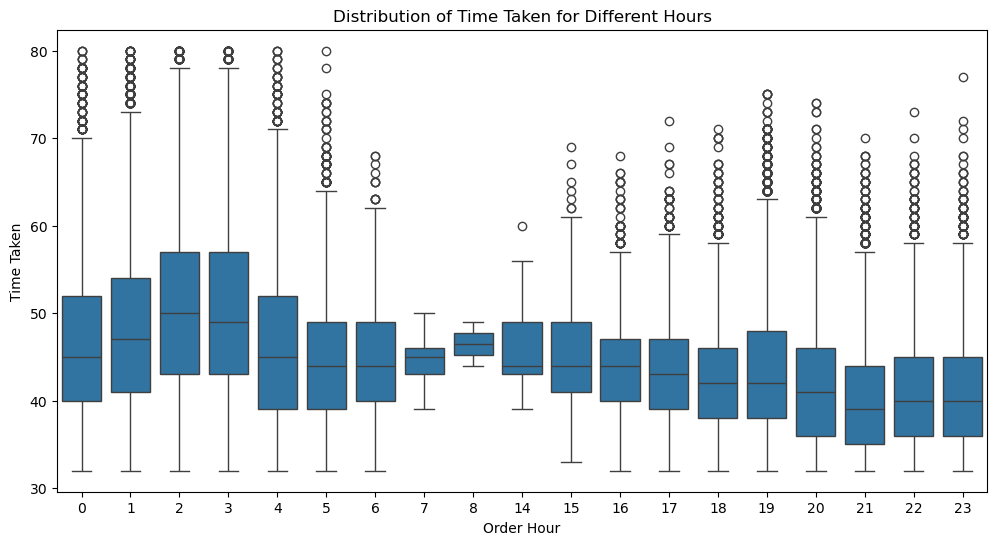

In [21]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour', y='time_taken', data=data)
plt.title('Distribution of Time Taken for Different Hours')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken')
plt.show()

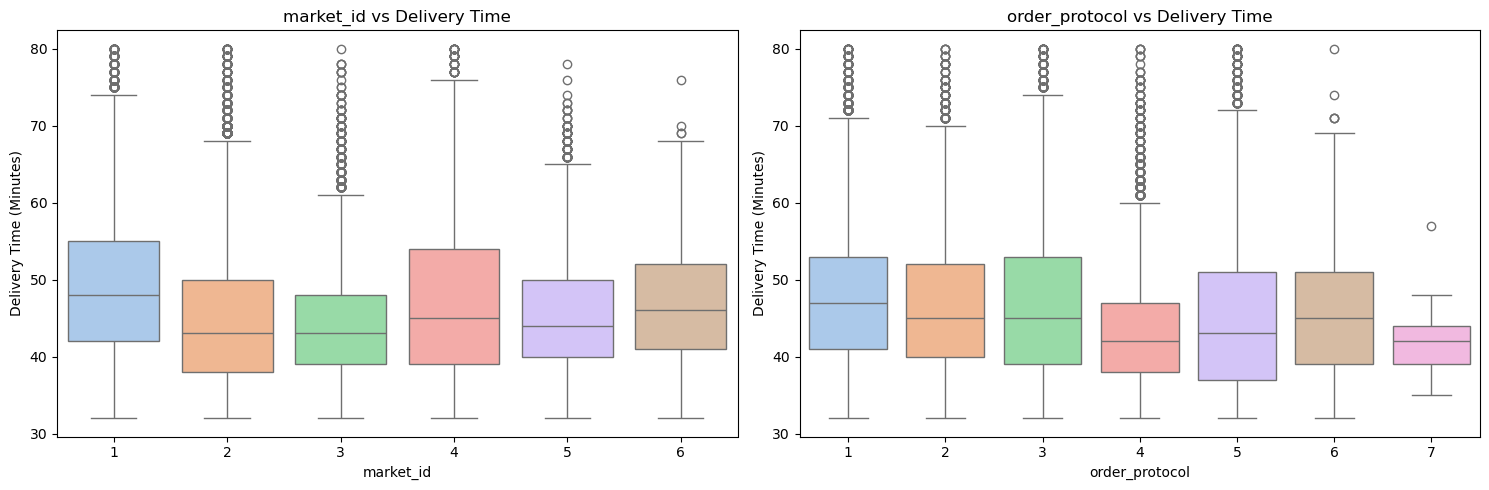

In [22]:
# Distribution of different categorical variables with time_taken
plt.figure(figsize=(15, 5))
for i, col in enumerate(['market_id', 'order_protocol']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=X_train[col], y=y_train, palette='pastel')
    plt.title(f'{col} vs Delivery Time')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (Minutes)')

plt.tight_layout()
plt.show()


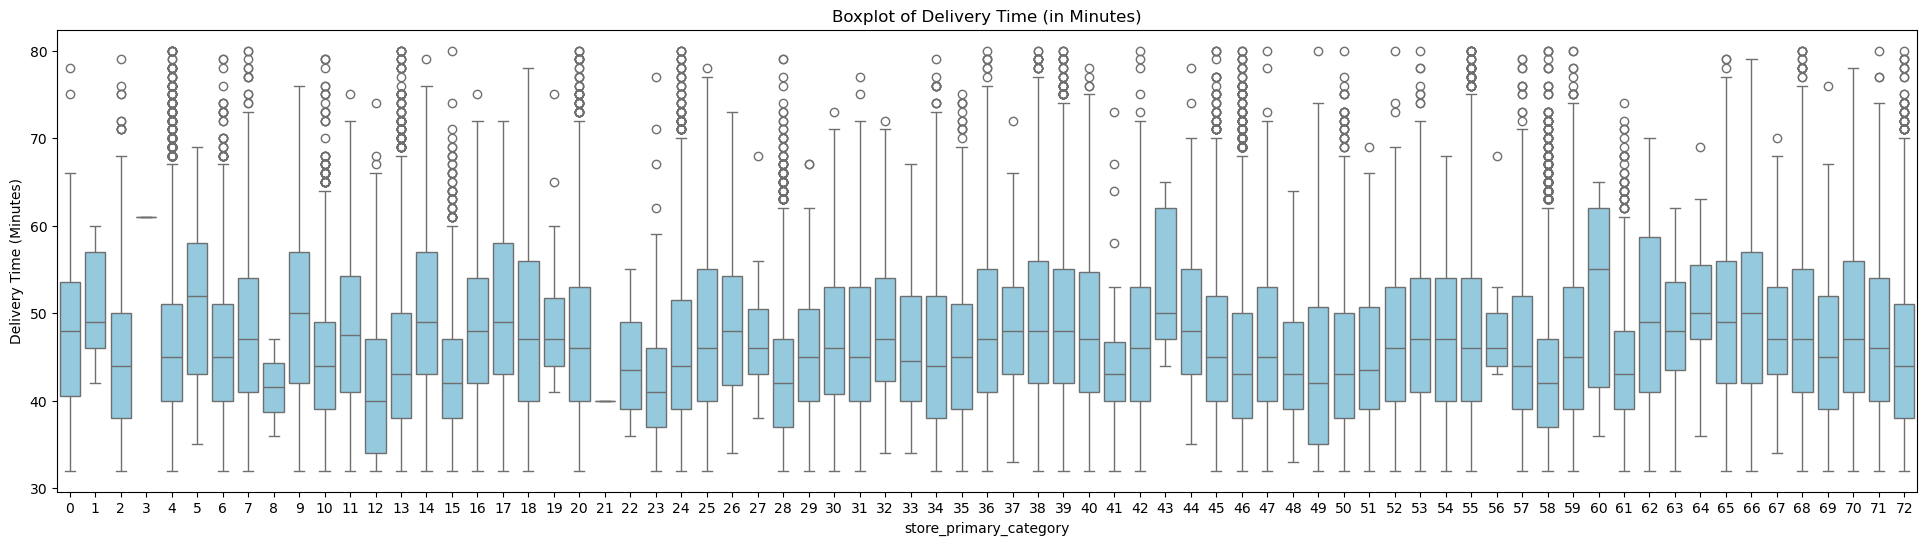

In [23]:
# Distribution of store_primary_category with time_taken
plt.figure(figsize=(24, 6))
sns.boxplot(x = X_train['store_primary_category'],y=y_train, color='skyblue')
plt.title('Boxplot of Delivery Time (in Minutes)')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

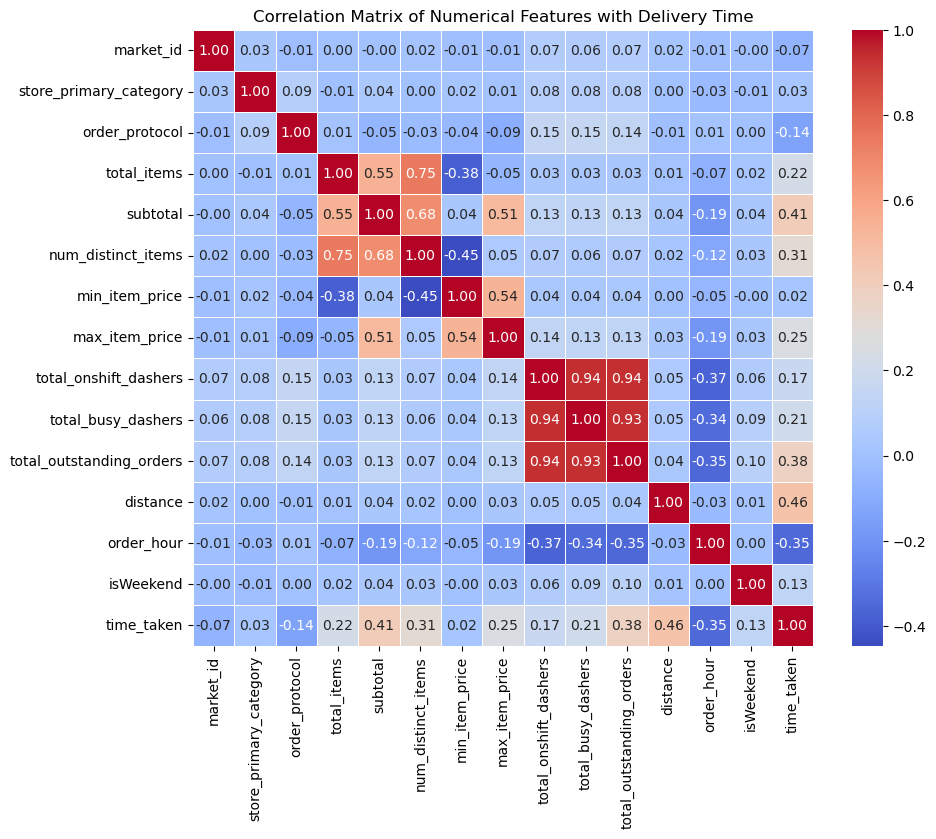

In [24]:
# Plot the heatmap of the correlation matrix
correlation_data = X_train.copy()
correlation_data['time_taken'] = y_train
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features with Delivery Time')
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [25]:
# Drop 3-5 weakly correlated columns from training dataset
correlation_with_target = correlation_matrix['time_taken'].drop('time_taken')
correlation_threshold = 0.1

weak_columns = correlation_with_target[correlation_with_target.abs() < correlation_threshold].index.tolist()
print(f"Columns with weak correlation to target: {weak_columns}")


Columns with weak correlation to target: ['market_id', 'store_primary_category', 'min_item_price']


In [26]:
X_train = X_train.drop(columns=weak_columns)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138340 entries, 18033 to 123969
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   order_protocol            138340 non-null  category
 1   total_items               138340 non-null  int64   
 2   subtotal                  138340 non-null  int64   
 3   num_distinct_items        138340 non-null  int64   
 4   max_item_price            138340 non-null  int64   
 5   total_onshift_dashers     138340 non-null  int64   
 6   total_busy_dashers        138340 non-null  int64   
 7   total_outstanding_orders  138340 non-null  int64   
 8   distance                  138340 non-null  float64 
 9   order_hour                138340 non-null  category
 10  isWeekend                 138340 non-null  category
dtypes: category(3), float64(1), int64(7)
memory usage: 9.9 MB


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

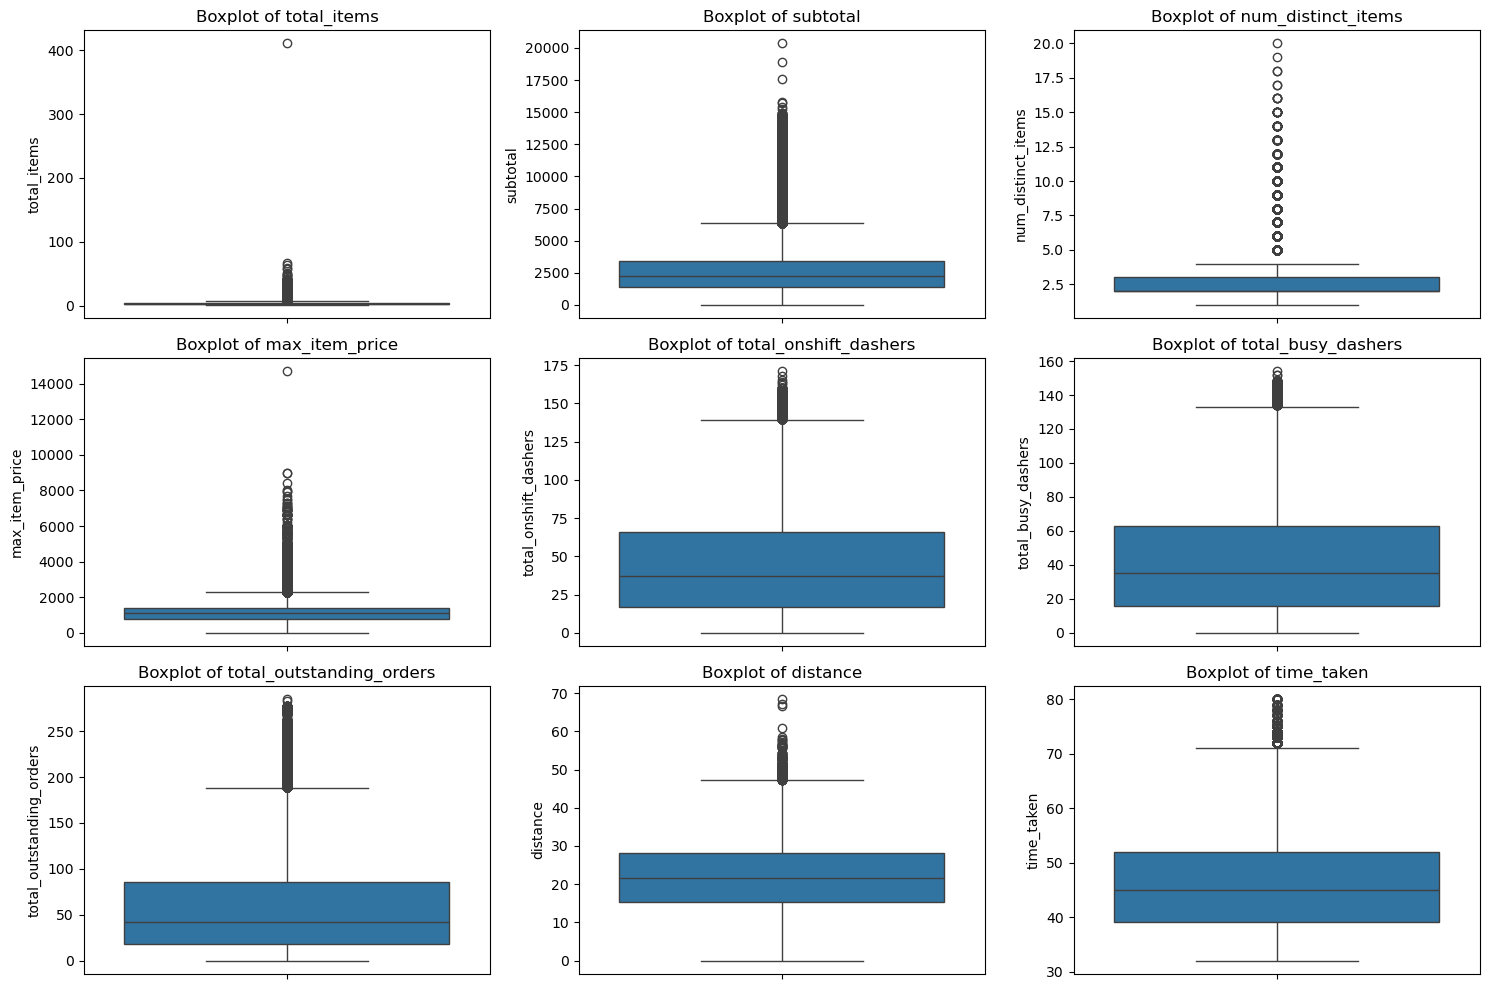

In [28]:
# Boxplot for time_taken
numerical_cols_with_target = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() + ['time_taken']
data_for_boxplot = X_train.copy()
data_for_boxplot['time_taken'] = y_train

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols_with_target):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_for_boxplot[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [29]:
# Handle outliers
X_train = X_train[X_train['total_items'] <= 8]
X_train = X_train[X_train['subtotal'] <= 12500]
X_train = X_train[X_train['num_distinct_items'] <= 7]
X_train = X_train[X_train['max_item_price'] <= 6000]
X_train = X_train[X_train['total_onshift_dashers'] <= 175]
X_train = X_train[X_train['total_outstanding_orders'] <= 250]
X_train = X_train[X_train['distance'] <= 60 ]

y_train = y_train.loc[X_train.index]

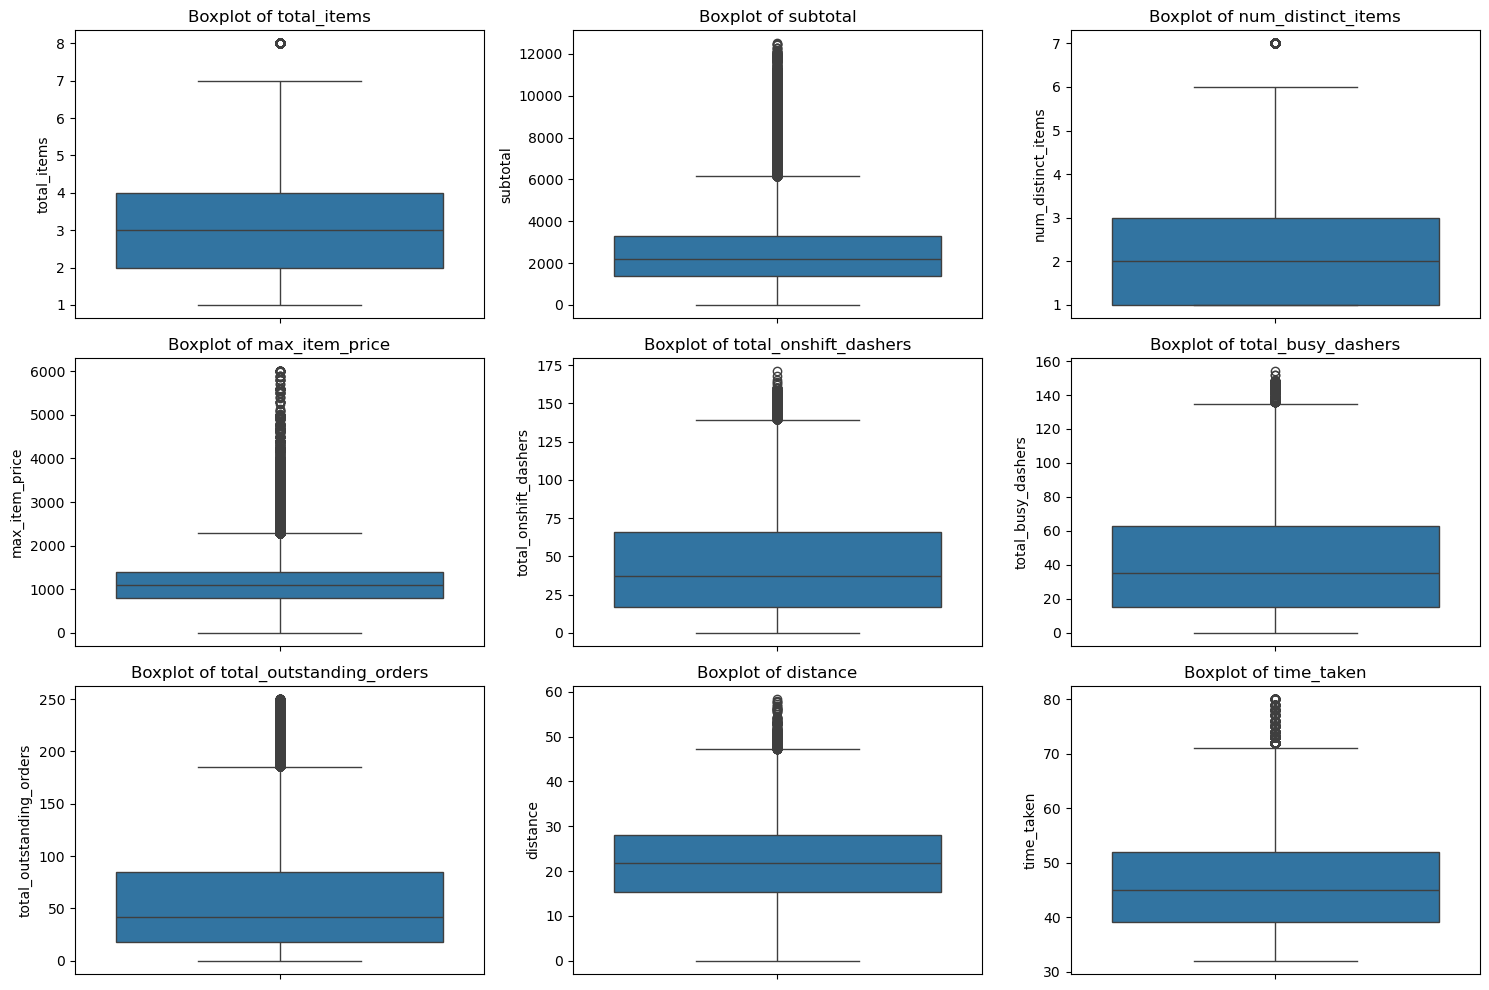

In [30]:
# Boxplot for numnerical columns with time_taken after removing outliers
numerical_cols_with_target = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() + ['time_taken']
data_for_boxplot = X_train.copy()
data_for_boxplot['time_taken'] = y_train

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols_with_target):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_for_boxplot[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [31]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_test.select_dtypes(include=['category']).columns.tolist()

print(f'Numerical columns are: {numerical_cols}\n')
print(f'Categorical columns are: {categorical_cols}\n')

Numerical columns are: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

Categorical columns are: ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'isWeekend']



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

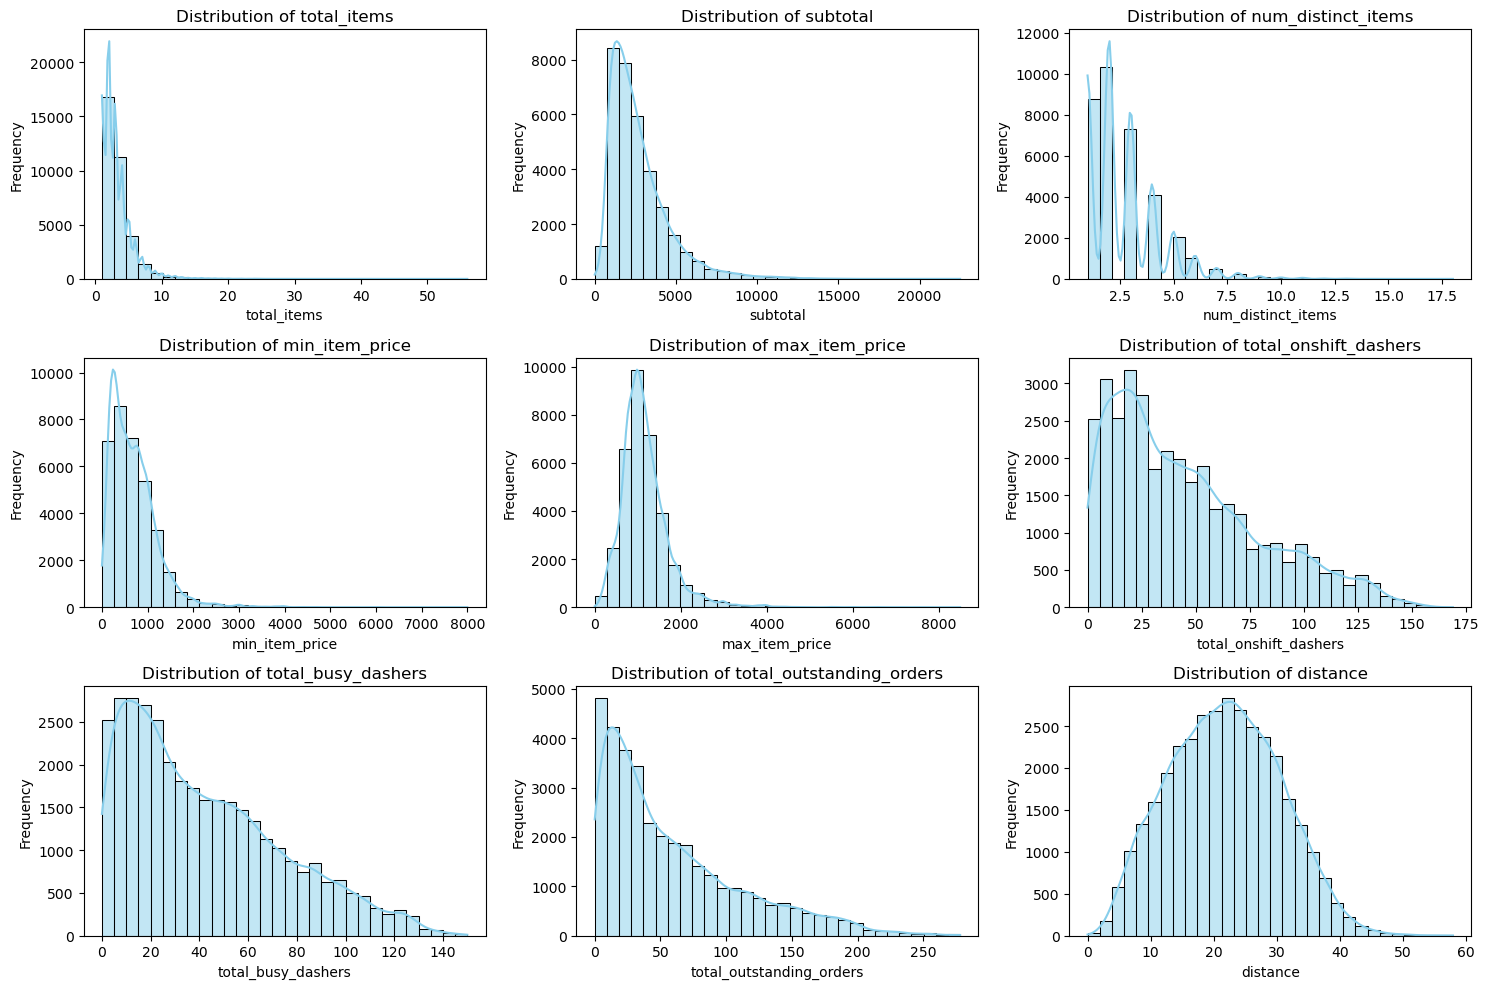

In [32]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_test[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

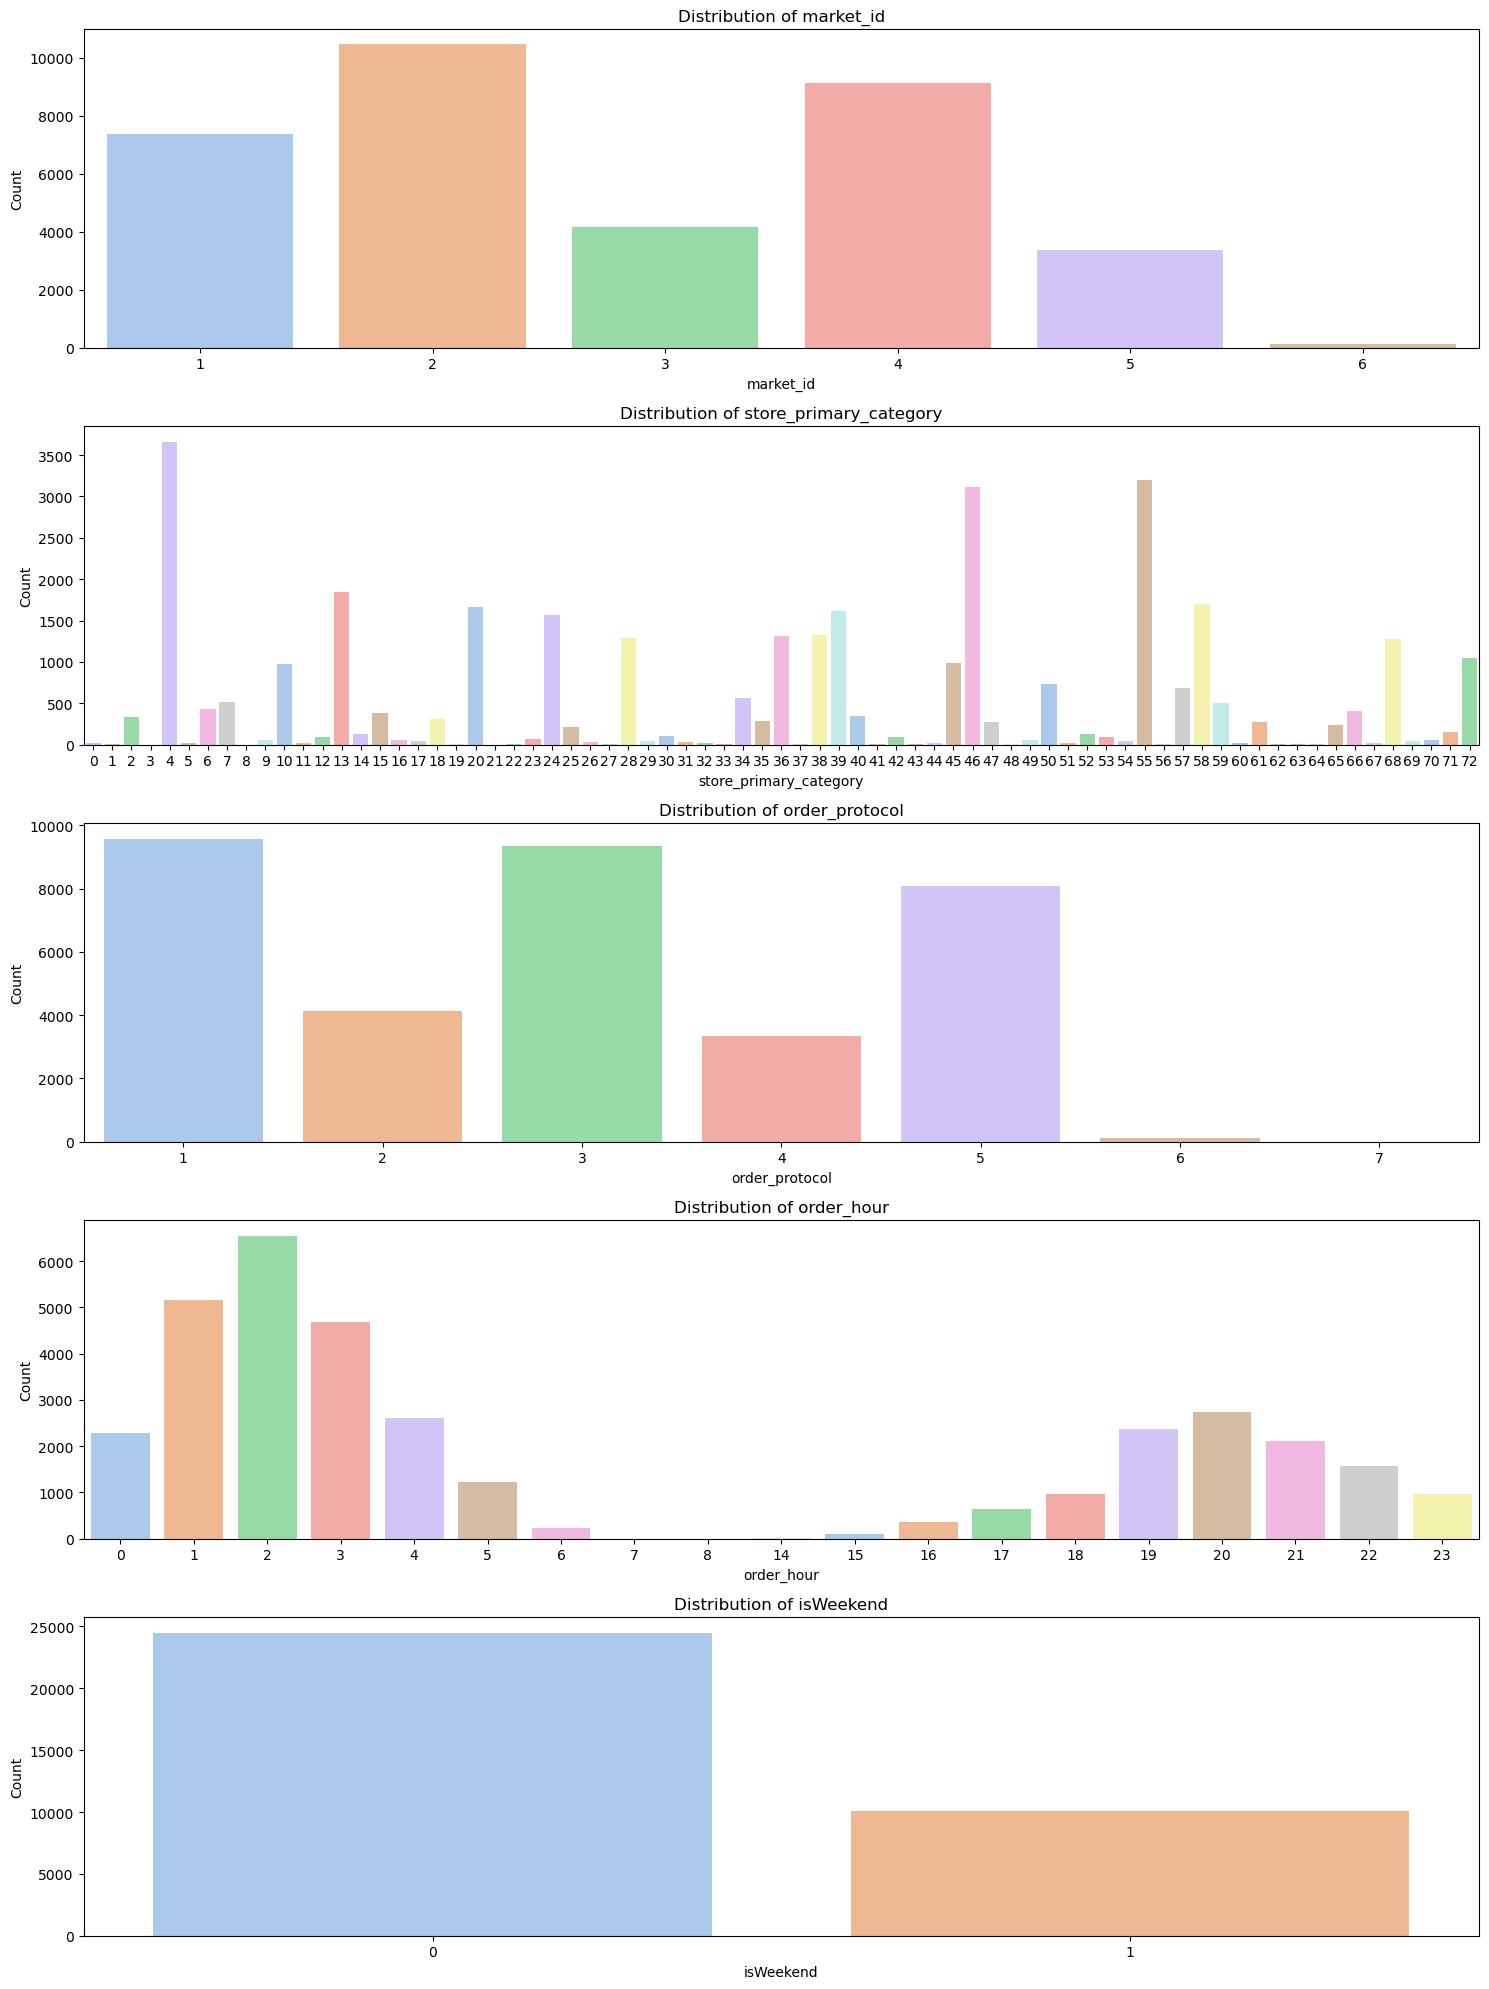

In [33]:
# Distribution of categorical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 1, i + 1)
    sns.countplot(x=X_test[col], palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

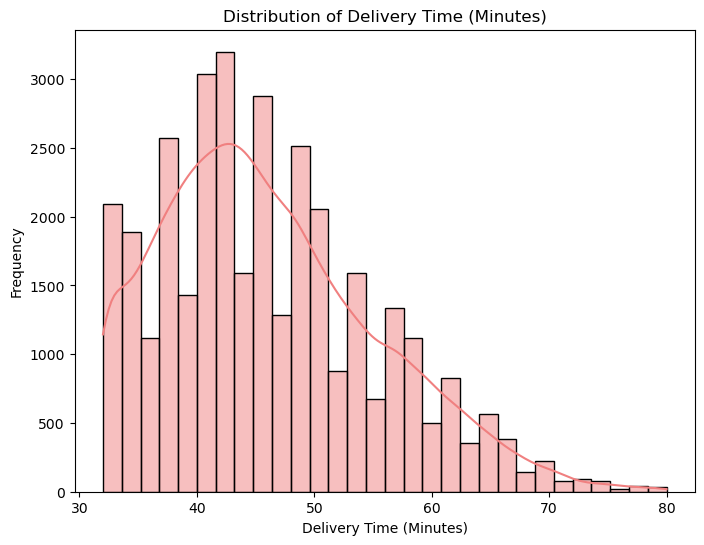

In [34]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_test, kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

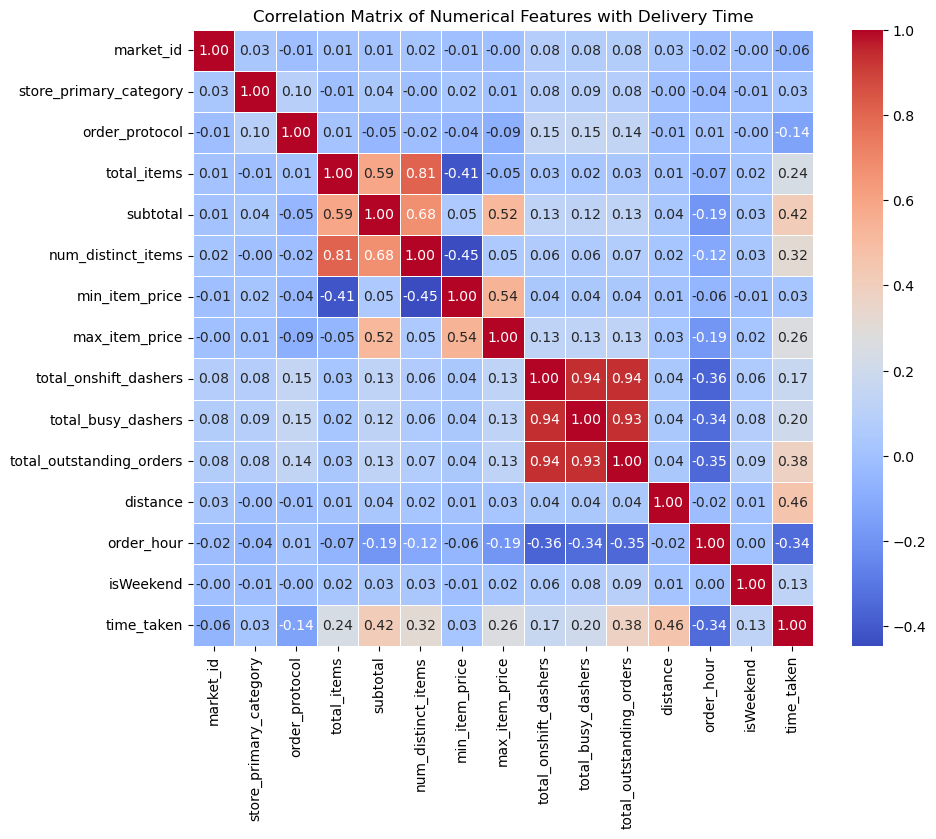

In [35]:
# Plot the heatmap of the correlation matrix
correlation_data = X_test.copy()
correlation_data['time_taken'] = y_test
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features with Delivery Time')
plt.show()



#### **4.3** Drop the columns with weak correlations with the target variable

In [36]:
# Drop the weakly correlated columns from training dataset
correlation_with_target = correlation_matrix['time_taken'].drop('time_taken')
correlation_threshold = 0.1

weak_columns = correlation_with_target[correlation_with_target.abs() < correlation_threshold].index.tolist()
print(f"Columns with weak correlation to target: {weak_columns}")

Columns with weak correlation to target: ['market_id', 'store_primary_category', 'min_item_price']


In [37]:
X_test = X_test.drop(columns=weak_columns)

In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34586 entries, 112164 to 172479
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_protocol            34586 non-null  category
 1   total_items               34586 non-null  int64   
 2   subtotal                  34586 non-null  int64   
 3   num_distinct_items        34586 non-null  int64   
 4   max_item_price            34586 non-null  int64   
 5   total_onshift_dashers     34586 non-null  int64   
 6   total_busy_dashers        34586 non-null  int64   
 7   total_outstanding_orders  34586 non-null  int64   
 8   distance                  34586 non-null  float64 
 9   order_hour                34586 non-null  category
 10  isWeekend                 34586 non-null  category
dtypes: category(3), float64(1), int64(7)
memory usage: 3.5 MB


#### **4.4** Outliers Handling for test data

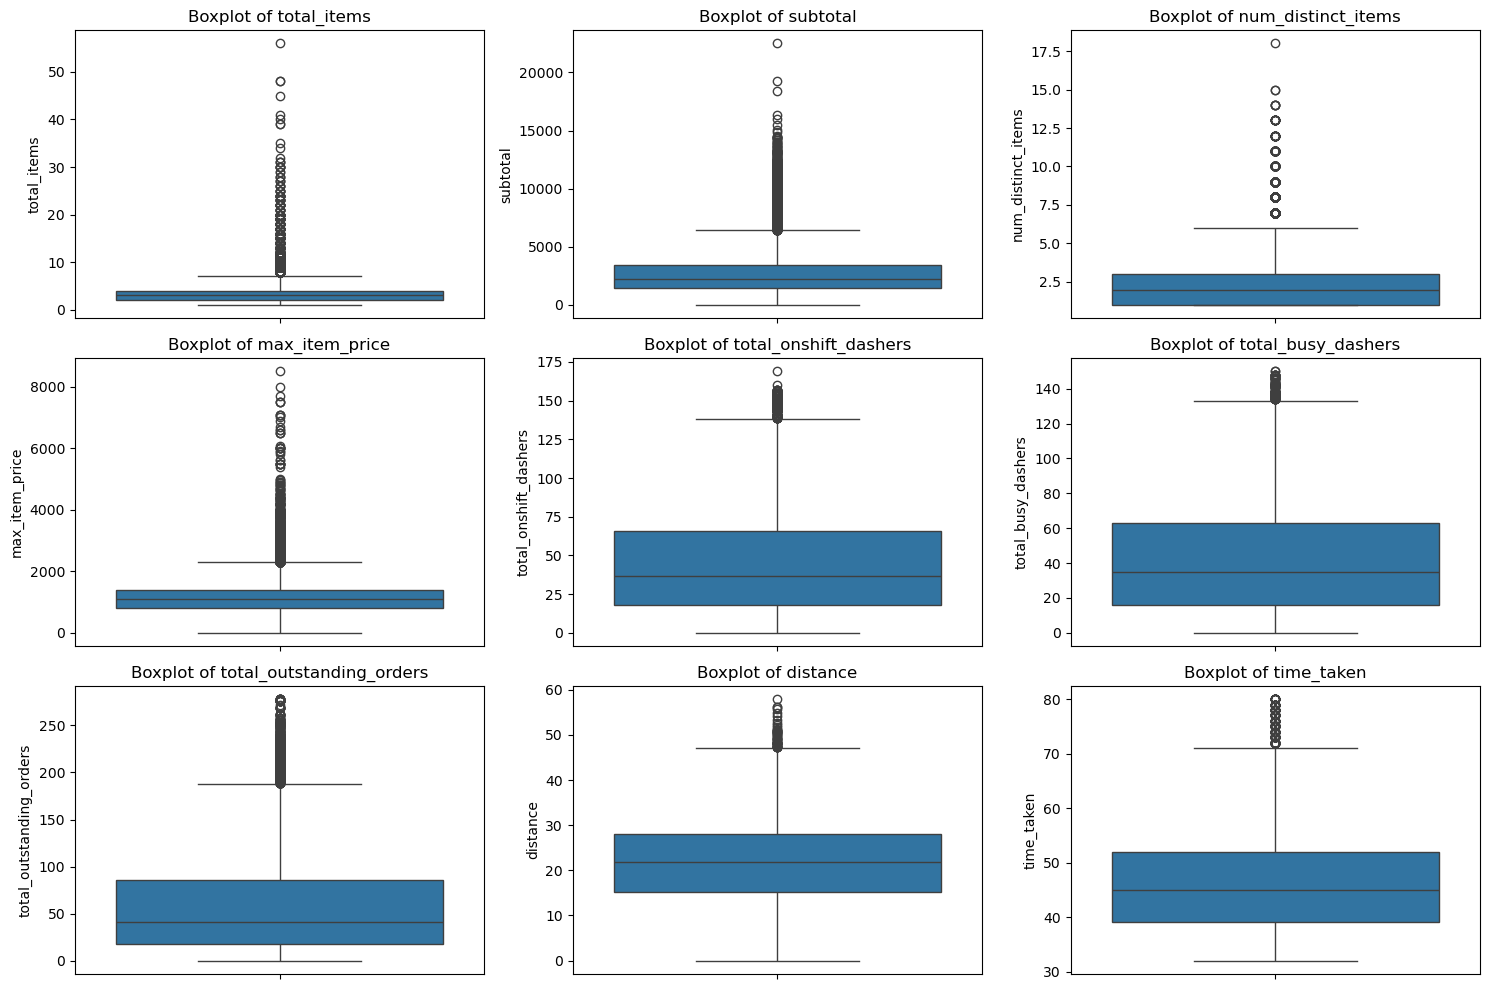

In [39]:
# Boxplot for time_taken
numerical_cols_with_target = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist() + ['time_taken']
data_for_boxplot = X_test.copy()
data_for_boxplot['time_taken'] = y_test

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_cols_with_target):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_for_boxplot[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [40]:
# Handling outliers
X_test = X_test[X_test['total_items'] <= 8]
X_test = X_test[X_test['subtotal'] <= 12500]
X_test = X_test[X_test['num_distinct_items'] <= 7]
X_test = X_test[X_test['max_item_price'] <= 6000]
X_test = X_test[X_test['total_onshift_dashers'] <= 175]
X_test = X_test[X_test['total_outstanding_orders'] <= 250]
X_test = X_test[X_test['distance'] <= 60 ]

y_test = y_test.loc[X_test.index]

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133124, 11), (33279, 11), (133124,), (33279,))

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [42]:
# Import libraries
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [43]:
# Apply scaling to the numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()

# Fit and transform the numerical columns in training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform the numerical columns in test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [44]:
scaler.scale_


array([1.64890363e+00, 1.57790469e+03, 1.36104977e+00, 5.43552545e+02,
       3.44447053e+01, 3.20270646e+01, 5.20259145e+01, 8.73957592e+00])

In [45]:
X_train.head()

order_protocol  total_items  subtotal  num_distinct_items  \
18033               3    -1.143964 -0.834210           -1.119481   
165652              5    -1.143964 -1.035743           -1.119481   
44087               4     0.068963 -1.139045            0.349973   
136937              3     0.068963  0.103743            0.349973   
47703               5     2.494817  1.875079            3.288881   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
18033        -0.121941               0.519689            0.716905   
165652       -0.357429               1.739034            1.622390   
44087        -1.584541              -0.786753           -0.750603   
136937       -0.020755              -0.206112            0.467117   
47703         1.349858               1.419682            1.435048   

        total_outstanding_orders  distance order_hour isWeekend  
18033                   0.648955 -1.201666          4         1  
165652                  1.071821 -0.373250          1         0  
44087                  -0.773413  0.954045         20         0  
136937                 -0.139114 -0.226790         19         0  
47703                   1.975217 -0.098637          2         1

In [46]:
X_test.head()

order_protocol  total_items  subtotal  num_distinct_items  \
112164              2    -0.537500 -0.863996           -0.384754   
94933               5    -1.143964 -0.831041           -1.119481   
1831                1    -1.143964 -0.422271           -1.119481   
15101               3    -1.143964 -0.616199           -1.119481   
138977              3    -1.143964 -1.239811           -1.119481   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
112164       -0.298557               0.490657           -0.032461   
94933         0.163220              -0.699657           -0.875498   
1831          1.349858               0.258400           -0.063684   
15101         0.786895               1.564842            1.341377   
138977       -1.244187              -0.931913           -0.875498   

        total_outstanding_orders  distance order_hour isWeekend  
112164                  0.072319  1.855691          3         0  
94933                  -0.734971  0.949469         18         1  
1831                   -0.119893 -1.302357          1         0  
15101                   1.321696  0.111899          2         0  
138977                 -0.811856  1.086775          3         0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [47]:
# Create/Initialise the model
model = LinearRegression()


In [48]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [50]:
y_train_pred.shape, y_test_pred.shape, X_train.shape, X_test.shape, y_test.shape

((133124,), (33279,), (133124, 11), (33279, 11), (33279,))

In [51]:
# Find results for evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate model performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Model Evaluation Results:\n")
print(f"Training Set \nMSE: {mse_train:.4f}, \nRMSE: {rmse_train:.4f}, \nMAE: {mae_train:.4f}, \nR²: {r2_train:.4f}\n")
print(f"Test Set \nMSE: {mse_test:.4f}, \nRMSE: {rmse_test:.4f}, \nMAE: {mae_test:.4f}, \nR²: {r2_test:.4f}")



Model Evaluation Results:

Training Set 
MSE: 10.5890, 
RMSE: 3.2541, 
MAE: 2.3718, 
R²: 0.8684

Test Set 
MSE: 10.8339, 
RMSE: 3.2915, 
MAE: 2.4061, 
R²: 0.8663


In [52]:
# Get the list of training features
training_features = X_train.columns.tolist()

# Get the coefficients of the trained model
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_coefficients = pd.DataFrame({'Feature': training_features, 'Coefficient': coefficients})

# Sort by absolute value of coefficients for better understanding
feature_coefficients['Absolute_Coefficient'] = feature_coefficients['Coefficient'].abs()
feature_coefficients = feature_coefficients.sort_values(by='Absolute_Coefficient', ascending=False).drop(columns='Absolute_Coefficient')

print("Feature names along with their coefficients:")
print(feature_coefficients)

Feature names along with their coefficients:
                     Feature  Coefficient
7   total_outstanding_orders    17.935525
5      total_onshift_dashers   -12.409420
6         total_busy_dashers    -4.421602
8                   distance     4.127961
2                   subtotal     2.075477
10                 isWeekend     1.077243
3         num_distinct_items     0.715412
0             order_protocol    -0.671921
4             max_item_price     0.336865
9                 order_hour    -0.246146
1                total_items    -0.129641


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [53]:
# Loop through the number of features and test the model
model = LinearRegression()

# Initializes RFE with the model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=9)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'isWeekend'],
      dtype='object')


In [54]:
# Build the final model with selected number of features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

# Predictions with selected features
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)


# Results for evaluation metrics
# Model performance on the train set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Model performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Model Evaluation Results:\n")
print(f"Training Set \nMSE: {mse_train:.4f}, \nRMSE: {rmse_train:.4f}, \nMAE: {mae_train:.4f}, \nR²: {r2_train:.4f}\n")
print(f"Test Set \nMSE: {mse_test:.4f}, \nRMSE: {rmse_test:.4f}, \nMAE: {mae_test:.4f}, \nR²: {r2_test:.4f}")

Model Evaluation Results:

Training Set 
MSE: 14.2706, 
RMSE: 3.7776, 
MAE: 2.8584, 
R²: 0.8227

Test Set 
MSE: 14.5198, 
RMSE: 3.8105, 
MAE: 2.8852, 
R²: 0.8208


In [55]:
# Feature ranking after RFE
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Rank')

print(feature_ranking)

                     Feature  Rank
0             order_protocol     1
2                   subtotal     1
3         num_distinct_items     1
4             max_item_price     1
5      total_onshift_dashers     1
6         total_busy_dashers     1
7   total_outstanding_orders     1
8                   distance     1
10                 isWeekend     1
9                 order_hour     2
1                total_items     3


In [56]:
# List of training features
training_features = X_train_selected.columns.tolist()
print(f"Training features are: \n{training_features}\n")

# Coefficients of the trained model
coefficients = model.coef_
print(f"Coefficients are: \n{coefficients}\n")

Training features are: 
['order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']

Coefficients are: 
[ -0.74011421   2.18772671   0.7480799    0.58177364 -11.73465123
  -4.61944382  18.20133442   4.14146116   0.89950199]



In [57]:
# Checking VIF for selected features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_selected.columns.tolist()
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

print(vif_data)

                    Feature        VIF
0            order_protocol   1.317460
1                  subtotal   3.164938
2        num_distinct_items   2.162748
3            max_item_price   1.891825
4     total_onshift_dashers  11.837502
5        total_busy_dashers  10.968866
6  total_outstanding_orders  10.114595
7                  distance   1.003707
8                 isWeekend   1.324313


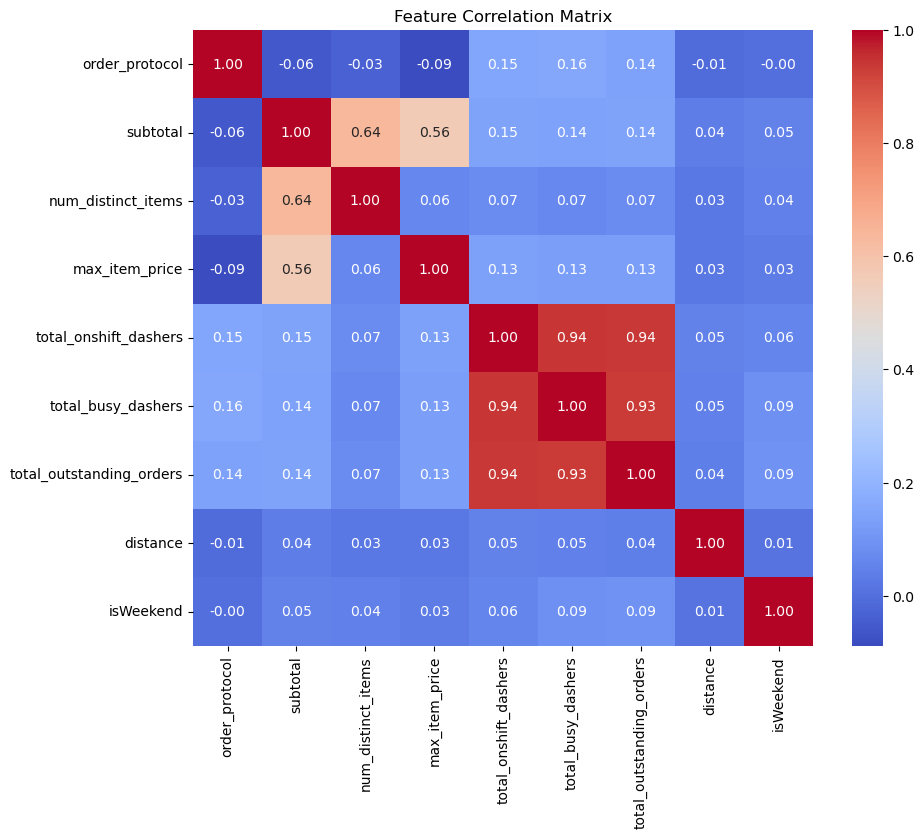

In [58]:
# Calculate correlation matrix
correlation_matrix = X_train_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [59]:
# Dropped columns 'total_busy_dashers' due to high VIF value
X_train_selected = X_train_selected.drop(['total_onshift_dashers'], axis=1)
X_test_selected = X_test_selected.drop(['total_onshift_dashers'], axis=1)

In [60]:
# model fit with new selected columns
model.fit(X_train_selected, y_train)

LinearRegression()

In [61]:
# Predictions with new selected features
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)


# Results for evaluation metrics
# Model performance on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Model performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Model Evaluation Results:\n")
print(f"Training Set \nMSE: {mse_train:.4f}, \nRMSE: {rmse_train:.4f}, \nMAE: {mae_train:.4f}, \nR²: {r2_train:.4f}\n")
print(f"Test Set \nMSE: {mse_test:.4f}, \nRMSE: {rmse_test:.4f}, \nMAE: {mae_test:.4f}, \nR²: {r2_test:.4f}")

Model Evaluation Results:

Training Set 
MSE: 25.9028, 
RMSE: 5.0895, 
MAE: 3.8942, 
R²: 0.6781

Test Set 
MSE: 26.1834, 
RMSE: 5.1170, 
MAE: 3.9097, 
R²: 0.6768


In [62]:
# Recalculating VIF for new model
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_selected.columns.tolist()
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

print(vif_data)

                    Feature       VIF
0            order_protocol  1.313269
1                  subtotal  3.164749
2        num_distinct_items  2.162580
3            max_item_price  1.891505
4        total_busy_dashers  7.730249
5  total_outstanding_orders  7.728181
6                  distance  1.003348
7                 isWeekend  1.311962


Since all VIF values are less than 10, with R² value of 0.67 which is moderate fit, this model will perform well in predicting values as well as in feature analysis.

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

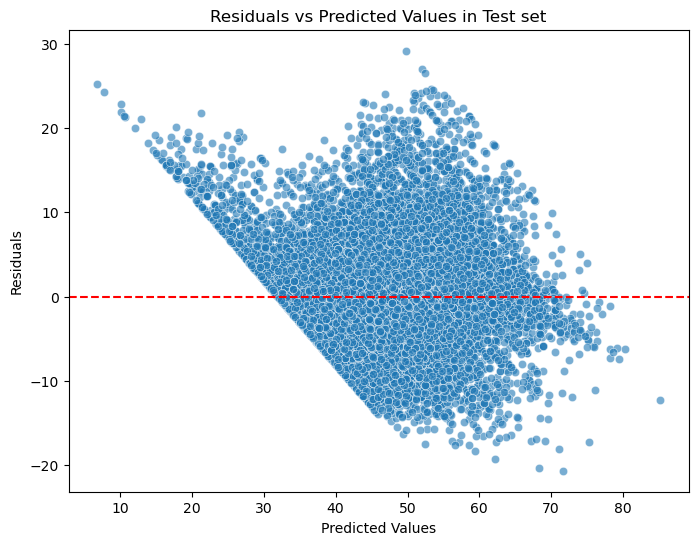

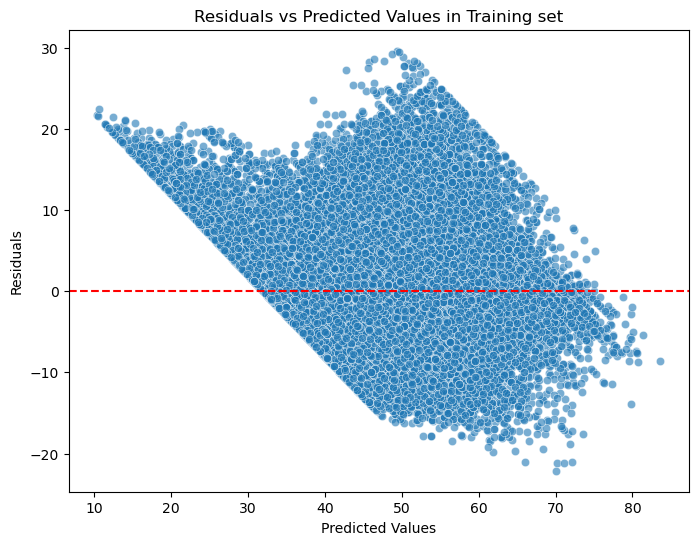

In [63]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Scatter plot for residuals in test set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals_test, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values in Test set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Scatter plot for residuals in training set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals_train, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values in Training set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


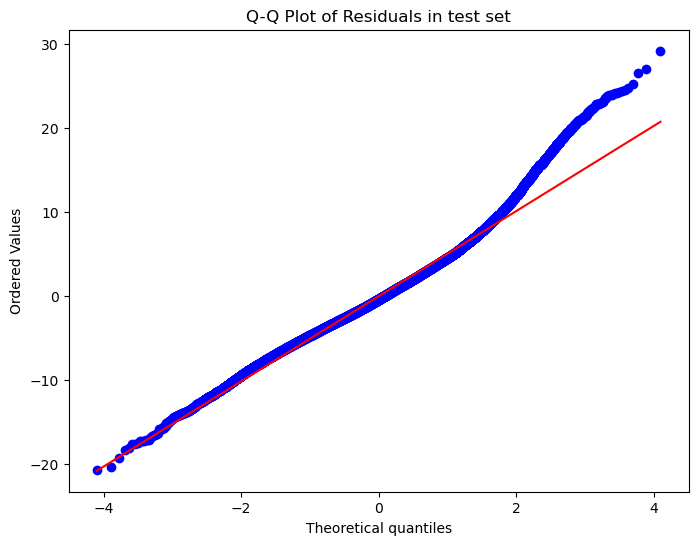

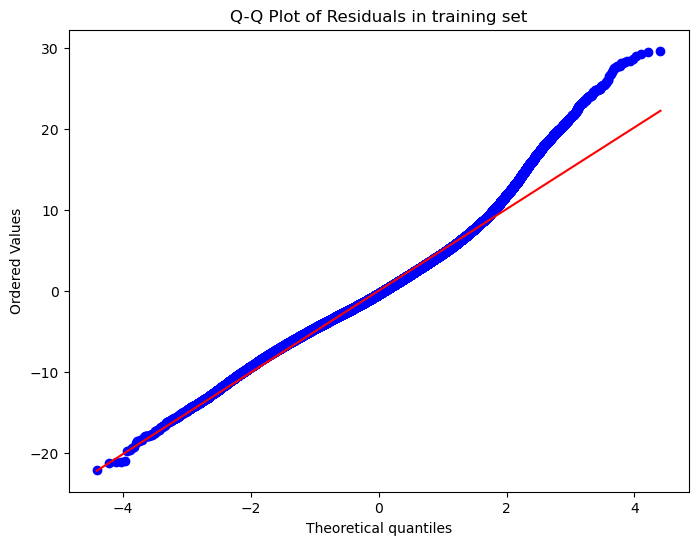

In [64]:
# Q-Q plot of residuals in test set
plt.figure(figsize=(8, 6))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals in test set')
plt.show()

# Q-Q plot of residuals in training set
plt.figure(figsize=(8, 6))
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals in training set')
plt.show()

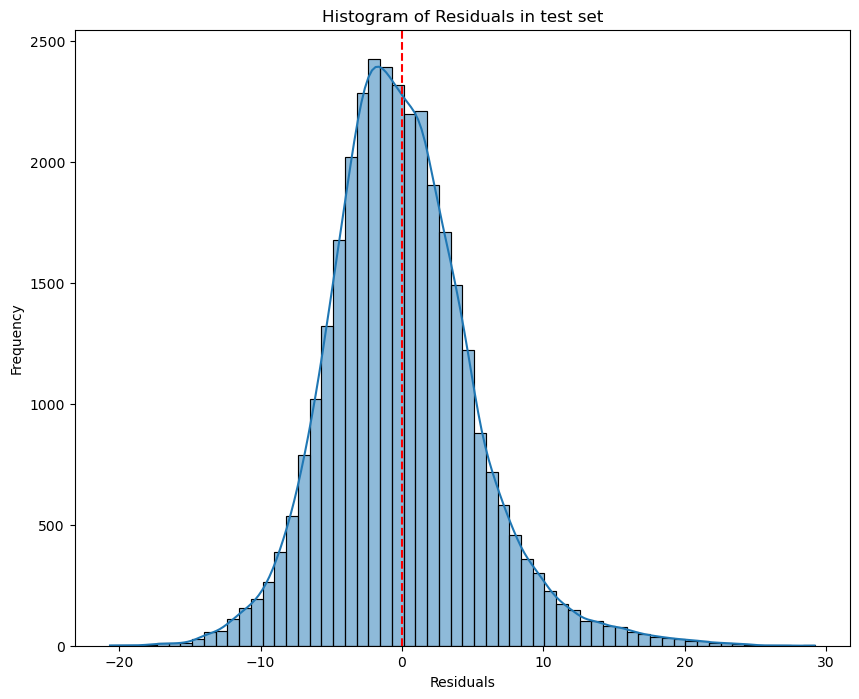

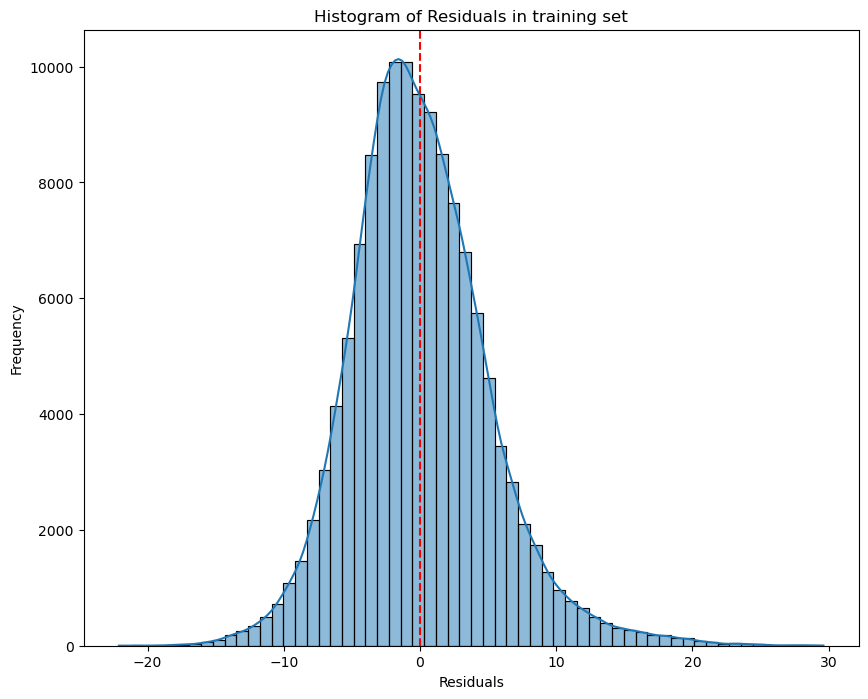

In [65]:
# Histplot of Residuals in test set
plt.figure(figsize=(10, 8))
sns.histplot(residuals_test, kde=True, bins=60)
plt.title('Histogram of Residuals in test set')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

# Histplot of Residuals in training set
plt.figure(figsize=(10, 8))
sns.histplot(residuals_train, kde=True, bins=60)
plt.title('Histogram of Residuals in training set')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

In [66]:
# Description of residuals of training set
print("Residuals of training set:")
print(residuals_train.describe().round(4))

# Description of residuals of test set
print("\nResiduals of test set:")
print(residuals_test.describe().round(4))

Residuals of training set:
count    133124.0000
mean          0.0000
std           5.0895
min         -22.1112
25%          -3.2892
50%          -0.3933
75%           2.9229
max          29.6155
Name: time_taken, dtype: float64

Residuals of test set:
count    33279.0000
mean        -0.0253
std          5.1170
min        -20.6481
25%         -3.3282
50%         -0.3975
75%          2.8706
max         29.1742
Name: time_taken, dtype: float64


[Your inferences here:]

1. These 3 features have the most significant influence on the target variable. Since these is huge difference in feature magnitude, it's better to use scaled coeficients for comparision

     *total_outstanding_orders:* This feature is increasing delivery time with highest scaled coefficient of 12.93. <br>
     *total_busy_dashers:* This feature is decreasing delivery time with scaled coefficent of -10.76. <br>
     *distance:* This feature is increasing delivery time with highest scaled coefficient of 4.08. <br>

2. Initial data contained extreme values that needed careful handling to prevent model distortion.

    Features Where Outliers Were Handled <br>
    *time_taken* (capped at 80) <br>
    *total_items* (capped at 8) <br>
    *subtotal* (capped at 12500) <br>
    *num_distinct_items* (capped at 7) <br>
    *max_item_price* (capped at 6000) <br>
    *total_onshift_dashers* (capped at 175) <br>
    *distance* (capped at 60) <br>

3. Removing negative values and capping outliers improved model performance.
4. Train-test split was done in ratio of 80:20. This ensured that we can verify our model with unseen data.
5. Scaling ensured that coefficients of the model were comparable, improving interpretability.
6. Residuals are randomly distributed, suggesting no significant pattern was missed by the model.
7. Q-Q plots and histograms confirms the normality of residuals.
8. As per histplot of residuals, mean of residuals is 0 for both test and training set.
9. These are the final evaluation metrics:
    Training Set <br>
    MSE: 25.9028, <br>
    RMSE: 5.0895, <br>
    MAE: 3.8942, <br>
    R²: 0.6781<br>

    Test Set <br>
    MSE: 26.1834, <br>
    RMSE: 5.1170, <br>
    MAE: 3.9097, <br>
    R²: 0.6768<br>

10. Overall, model is able to predict the values correctly for most of the data and also correctly explains the factors impacting the delivery time.
    

   

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [67]:
# Compare the scaled vs unscaled features used in the final model
selected_features = X_train_selected.columns.tolist()
feature_coefficients = pd.DataFrame({'Feature': selected_features, 
                                     'Coefficient (Scaled)': model.coef_})

# Standard deviation of the original scaler
feature_std = scaler.scale_[X_train[selected_features].columns.get_indexer(selected_features)]

# Unscaled the coefficients
feature_coefficients['Coefficient (Unscaled)'] = feature_coefficients['Coefficient (Scaled)'] / feature_std

feature_coefficients




Feature  Coefficient (Scaled)  Coefficient (Unscaled)
0            order_protocol             -0.793838               -0.481434
1                  subtotal              2.140363                0.001356
2        num_distinct_items              0.704710                0.517769
3            max_item_price              0.523128                0.000962
4        total_busy_dashers            -10.761474               -0.312428
5  total_outstanding_orders             12.932534                0.403800
6                  distance              4.077060                0.078366
7                 isWeekend              1.612032                0.184452

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [68]:
# Analyze the effect of a unit change in a feature, say 'total_items'
feature_coefficients['Effect of Unit Change'] = feature_coefficients['Coefficient (Unscaled)']
feature_coefficients

Feature  Coefficient (Scaled)  Coefficient (Unscaled)  \
0            order_protocol             -0.793838               -0.481434   
1                  subtotal              2.140363                0.001356   
2        num_distinct_items              0.704710                0.517769   
3            max_item_price              0.523128                0.000962   
4        total_busy_dashers            -10.761474               -0.312428   
5  total_outstanding_orders             12.932534                0.403800   
6                  distance              4.077060                0.078366   
7                 isWeekend              1.612032                0.184452   

   Effect of Unit Change  
0              -0.481434  
1               0.001356  
2               0.517769  
3               0.000962  
4              -0.312428  
5               0.403800  
6               0.078366  
7               0.184452

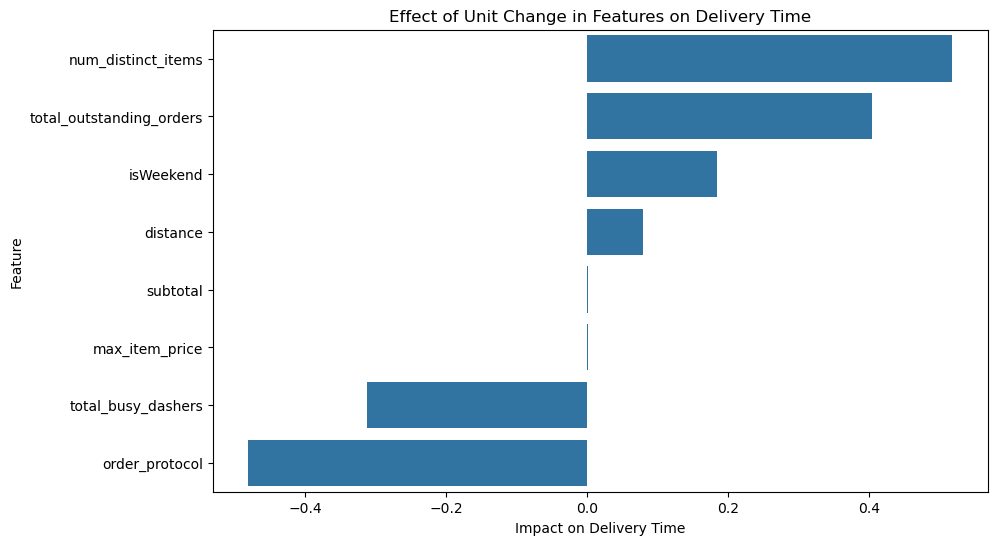

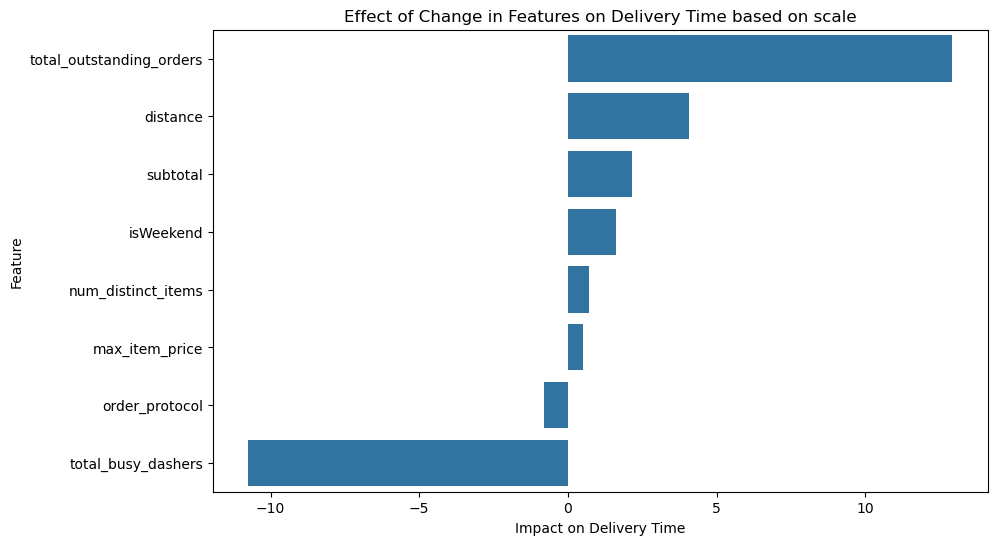

In [69]:
# Plot the unscaled coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient (Unscaled)', y='Feature', data=feature_coefficients.sort_values('Coefficient (Unscaled)', ascending=False))
plt.title('Effect of Unit Change in Features on Delivery Time')
plt.xlabel('Impact on Delivery Time')
plt.ylabel('Feature')
plt.show()


# Plot the scaled coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient (Scaled)', y='Feature', data=feature_coefficients.sort_values('Coefficient (Scaled)', ascending=False))
plt.title('Effect of Change in Features on Delivery Time based on scale')
plt.xlabel('Impact on Delivery Time')
plt.ylabel('Feature')
plt.show()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

#### Conclusion ####

1. These 3 features have the most significant influence on the target variable. Since these is huge difference in feature magnitude, it's better to use scaled coeficients for comparision

     *total_outstanding_orders:* This feature is increasing delivery time with highest scaled coefficient of 12.93. <br>
     *total_busy_dashers:* This feature is decreasing delivery time with scaled coefficent of -10.76. <br>
     *distance:* This feature is increasing delivery time with highest scaled coefficient of 4.08. <br>

2. Initial data contained extreme values that needed careful handling to prevent model distortion.

    Features Where Outliers Were Handled <br>
    *time_taken* (capped at 80) <br>
    *total_items* (capped at 8) <br>
    *subtotal* (capped at 12500) <br>
    *num_distinct_items* (capped at 7) <br>
    *max_item_price* (capped at 6000) <br>
    *total_onshift_dashers* (capped at 175) <br>
    *distance* (capped at 60) <br>

3. Removing negative values and capping outliers improved model performance.
4. Train-test split was done in ratio of 80:20. This ensured that we can verify our model with unseen data.
5. Scaling ensured that coefficients of the model were comparable, improving interpretability.
6. Residuals are randomly distributed, suggesting no significant pattern was missed by the model.
7. Q-Q plots and histograms confirms the normality of residuals.
8. As per histplot of residuals, mean of residuals is 0 for both test and training set.
9. These are the final evaluation metrics:
    Training Set <br>
    MSE: 16.9850, <br>
    RMSE: 4.1213, <br>
    MAE: 3.0903, <br>
    R²: 0.8038<br>

    Test Set <br>
    MSE: 17.2377, <br>
    RMSE: 4.1518, <br>
    MAE: 3.0933, <br>
    R²: 0.8022<br>

10. Overall, model is able to predict the values correctly for most of the data and also correctly explains the factors impacting the delivery time.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

There are few categorical variables in dataset.
1. market_id
2. store primary category
3. order_protocol

Few more derived categorical variables are
1. isWeekend
2. order_hour

These categorical variables are don't have much impact on dependent variable. Except for "order_hour", all of them were eleminated at varous stages of data analysis and model building. "order_number" too has not too big impact on dependent variables. It's unscaled coeficient is -2.19 which is pretty low as compared to other impactful variables.

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

During splitting the data, test_size = 0.2 means that 20% of the dataset will be used for testing, while the remaining 80% will be used to train the model. This split helps assess how the model performs on new and unseen data. 

---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Feature *distance* has the highest positive correlation with the target variable time_taken, with a correlation value of approximately 0.46.

---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

I first plotted the boxplot of all the numerical columns. On inspection of the boxplots, there were outliers detected in few columns. Outliers were addressed by directly filtering the dataset using specific thresholds for key features. These thresholds were chosen by inspecting the distribution of values in the dataset using boxplot.

Features Where Outliers Were Handled <br>
    *time_taken* (capped at 80) <br>
    *total_items* (capped at 8) <br>
    *subtotal* (capped at 12500) <br>
    *num_distinct_items* (capped at 7) <br>
    *max_item_price* (capped at 6000) <br>
    *total_onshift_dashers* (capped at 175) <br>
    *distance* (capped at 60) <br>

---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

These features have the most significant influence on the target variable. Since these is huge difference in feature magnitude, it's better to use scaled coeficients for comparision

1. *total_outstanding_orders:* This feature is increasing delivery time with highest scaled coefficient of 12.93.
2. *total_busy_dashers:* This feature is decreasing delivery time with scaled coefficent of -10.76.
3. *distance:* This feature is increasing delivery time with highest scaled coefficient of 4.08.
   


---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> 

Linear Regression is a *supervised machine learning algorithm* that models the relationship between a *dependent variable (Y)* and one or more *independent variables (X)* by fitting a linear equation to the observed data. It is commonly used for *predicting continuous values*.

The equation for a linear regression model is:

Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ϵ
- *Y* - Target value (dependent variable)  
- *β₀* - Intercept (the value of Y when all X values are 0)  
- *β₁, β₂, ..., βₙ* - Coefficients representing the change in Y for a unit change in corresponding X  
- *X₁, X₂, ..., Xₙ* - Independent variables (features)  
- *ϵ* - Error term accounting for variability not explained by the model  

The goal of linear regression is to minimize the *Cost Function* such as RMSE or MAE to find the best-fit line

Evaluation of Linear regression models are usually done using following metrices:
- *R² (Coefficient of Determination):* This measures how well the model explains the variability in the data.
- *MAE (Mean Absolute Error):* This is average of absolute errors.
- *RMSE (Root Mean Squared Error):* This measures the spread of residuals.

---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

 **Simple Linear Regression**
- This involves *one* independent variable (`X`) and one dependent variable (`Y`).
- The equation is:
  Y = β₀ + β₁X + ϵ

 **Multiple Linear Regression**
- This involves *two or more* independent variables (`X₁, X₂, ..., Xₙ`) and one dependent variable (`Y`).
- The equation is:
  Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ϵ

---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


The cost function measures the error between the predicted values and the actual values. The cost function quantifies how well the model fits the data. A lower cost value indicates better model performance.

**Mean Squared Error (MSE)** is commonly used as the cost function.
MSE = (1/n) * Σ (Y - Ŷ)²
- `n` is the number of data points.
- `Y` is the actual value.
- `Ŷ` is the predicted value.

**Gradient Descent** is commonly used to minimize the cost. Gradient Descent helps move toward the optimal solution by reducing the cost iteratively. Convergence occurs when the gradient approaches zero, indicating that the cost function is minimized.

β = β - α * ∂(Cost)/∂β

- `β` is the coefficient which has to be minimised.
- `α` is the learning rate.
- `∂(Cost)/∂β` is the gradient (partial derivative of the cost function).


---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

**Overfitting** happens when the model tries to learn too much from the training data. As a result, it performs extremely well on the training data but struggles to generalize to new, unseen data.

- *Symptoms:*
  - High accuracy on training data but poor performance on test data.
  - Model becomes too complex, learning unnecessary details.
- *Reason:*
  - Too many features relative to the amount of data.
  - Training the model for too many epochs.
- *Solution:*
  - Simplify the model by reducing the number of features.
  - Increase the size of the training dataset.

**Underfitting** happens when the model is too simple to capture the underlying structure of the data. It fails to learn the relationships, leading to poor performance on both training and test data.

- *Symptoms:*
  - Low accuracy on both training and test data.
  - Model misses important patterns in the data.
- *Reason:*
  - Using a model that’s too simple.
  - Insufficient training time or data.
- *Solution:*
  - Add more features or complexity to the model.
  - Train the model for a longer duration.

---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

A residual is the difference between the actual value and the predicted value. Residual plots display residuals (errors) against predicted values. By looking over residual plots, we can identify if a linear regression model is good fit or not. There can following 2 kinds of patterns which are generally observed in residual plots.

1. **Random Pattern (Good Fit)**
   - Residuals are randomly scattered around zero.
   - No clear pattern indicates that the model fits the data well.


2. **Non-Random Pattern (Bad Fit)**
   - *Curved Pattern:* Indicates a non-linear relationship. Suggests that a linear model may not be the best fit.
   - *Heteroscedasticity:* Residuals spread out as predicted values increase. Suggests that variance is not constant.
   - *Clusters or Trends:* Shows that the model is systematically missing certain patterns.
